In [1]:
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = 'largeFaceShape_dataset'
# The dataset folder is inside a subdirectory called 'dataset'
base_dir = os.path.join(dataset_path)
print('using dataset folder: ', base_dir)
#list the subdirectories in base_dir
subdirs = os.listdir(base_dir)
print('subdirectories in base_dir: ', subdirs)

using dataset folder:  largeFaceShape_dataset
subdirectories in base_dir:  ['test', 'train']


In [3]:

# Prepare a list to collect file paths and labels
data = []

# Iterate over the subdirectories (e.g., 'train' and 'test')
for split in subdirs:
    split_dir = os.path.join(base_dir, split)
    if not os.path.isdir(split_dir):
        print(f"Warning: {split_dir} is not a directory. Skipping.")
        continue
    # List class folders within each split directory
    class_folders = [os.path.join(split_dir, folder) for folder in os.listdir(split_dir)
                     if os.path.isdir(os.path.join(split_dir, folder))]
    print(f"Found class folders in '{split}':", [os.path.basename(cf) for cf in class_folders])

    # Iterate over each class folder
    for class_folder in class_folders:
        label = os.path.basename(class_folder)  # Use folder name as label (e.g., 'Heart')
        # Get all image file paths; adjust pattern if needed for your image types
        image_files = glob.glob(os.path.join(class_folder, '*.*'))
        print(f"Found {len(image_files)} files in '{label}' folder under '{split}'.")
        for img_path in image_files:
            data.append({'filepath': img_path, 'label': label, 'original_split': split})

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Check that the DataFrame contains the 'label' column and print key information
if 'label' in df.columns and not df.empty:
    print("Total samples in the dataset:", len(df))
    print("Class distribution:")
    print(df['label'].value_counts())
else:
    raise KeyError("The 'label' column is missing from the DataFrame or no data was found.")

# Split the dataset into train (70%), validation (20%), and test (10%)
# First, split out the test set (10% of the data)
train_val_df, test_df = train_test_split(
    df,
    test_size=0.10,
    stratify=df['label'],
    random_state=42
)

# From the remaining 90%, allocate 20% of the overall data to validation.
# That is approximately 22.22% of train_val_df.
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.2222,  # ~20% of overall data
    stratify=train_val_df['label'],
    random_state=42
)

# Display the number of samples for each split
print("\nTrain samples:", len(train_df))
print("Validation samples:", len(val_df))
print("Test samples:", len(test_df))

# Save the splits to CSV for further processing (optional)
train_df.to_csv("train_data.csv", index=False)
val_df.to_csv("val_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)


Found class folders in 'test': ['heart', 'long', 'oval', 'round', 'square']
Found 198 files in 'heart' folder under 'test'.
Found 242 files in 'long' folder under 'test'.
Found 236 files in 'oval' folder under 'test'.
Found 235 files in 'round' folder under 'test'.
Found 402 files in 'square' folder under 'test'.
Found class folders in 'train': ['heart', 'long', 'oval', 'round', 'square']
Found 2315 files in 'heart' folder under 'train'.
Found 2688 files in 'long' folder under 'train'.
Found 2892 files in 'oval' folder under 'train'.
Found 3215 files in 'round' folder under 'train'.
Found 3252 files in 'square' folder under 'train'.
Total samples in the dataset: 15675
Class distribution:
label
square    3654
round     3450
oval      3128
long      2930
heart     2513
Name: count, dtype: int64

Train samples: 10972
Validation samples: 3135
Test samples: 1568


In [4]:
import pandas as pd

train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

overlap = set(train_df['filepath']) & set(test_df['filepath'])
print(f"🔁 Found {len(overlap)} overlapping images between train and test sets.")

🔁 Found 0 overlapping images between train and test sets.


In [66]:
train_df

filepath   label  \
0      largeFaceShape_dataset\train\round\round-347-_...   round   
1      largeFaceShape_dataset\train\heart\heart-38-_j...   heart   
2      largeFaceShape_dataset\train\heart\heart-968-_...   heart   
3      largeFaceShape_dataset\train\long\oblong-347-_...    long   
4      largeFaceShape_dataset\train\heart\heart-884-_...   heart   
...                                                  ...     ...   
10967  largeFaceShape_dataset\train\round\round-199-_...   round   
10968  largeFaceShape_dataset\train\oval\image-ovale-...    oval   
10969  largeFaceShape_dataset\train\square\45_jpg.rf....  square   
10970  largeFaceShape_dataset\train\oval\image-ovale-...    oval   
10971  largeFaceShape_dataset\train\oval\ovale307_jpg...    oval   

      original_split  
0              train  
1              train  
2              train  
3              train  
4              train  
...              ...  
10967          train  
10968          train  
10969          train  
10970          train  
10971          train  

[10972 rows x 3 columns]

In [67]:
val_df

filepath   label  \
7473   largeFaceShape_dataset\train\oval\oval-479-_jp...    oval   
8600   largeFaceShape_dataset\train\oval\oval-913-_jp...    oval   
2429   largeFaceShape_dataset\train\heart\heart-54-_j...   heart   
15518  largeFaceShape_dataset\train\square\square-950...  square   
15314  largeFaceShape_dataset\train\square\square-871...  square   
...                                                  ...     ...   
14916  largeFaceShape_dataset\train\square\square-720...  square   
10244  largeFaceShape_dataset\train\round\round-42-_j...   round   
8234   largeFaceShape_dataset\train\oval\oval-789-_jp...    oval   
7655   largeFaceShape_dataset\train\oval\oval-560-_jp...    oval   
11421  largeFaceShape_dataset\train\round\round-652_j...   round   

      original_split  
7473           train  
8600           train  
2429           train  
15518          train  
15314          train  
...              ...  
14916          train  
10244          train  
8234           train  
7655           train  
11421          train  

[3135 rows x 3 columns]

In [68]:
test_df

filepath   label original_split
0     largeFaceShape_dataset\train\square\square-422...  square          train
1     largeFaceShape_dataset\train\round\round-722-_...   round          train
2     largeFaceShape_dataset\train\round\round-588_j...   round          train
3     largeFaceShape_dataset\train\square\134_jpg.rf...  square          train
4     largeFaceShape_dataset\train\heart\heart-165-_...   heart          train
...                                                 ...     ...            ...
1563  largeFaceShape_dataset\train\round\round-287-_...   round          train
1564  largeFaceShape_dataset\train\round\image-round...   round          train
1565  largeFaceShape_dataset\train\round\round-720-_...   round          train
1566  largeFaceShape_dataset\train\square\square-707...  square          train
1567  largeFaceShape_dataset\train\heart\heart-753-_...   heart          train

[1568 rows x 3 columns]

In [5]:
# libraries for analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

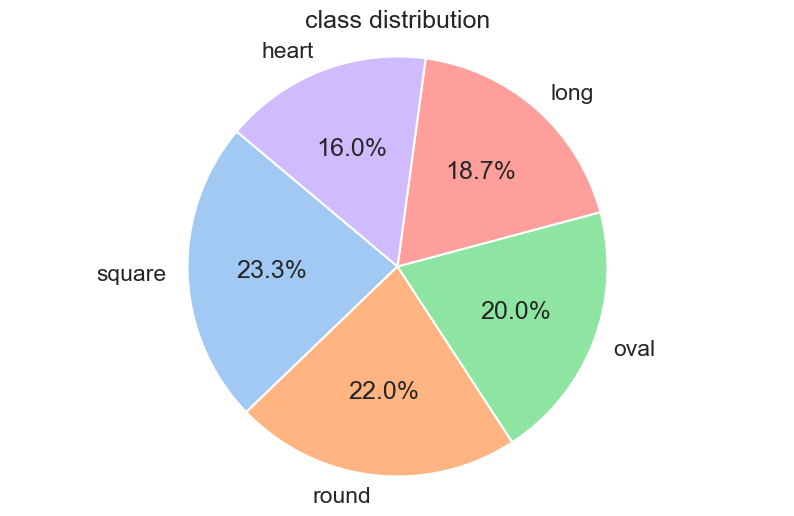

In [6]:
# plotting style
sns.set(style='whitegrid', context='talk')
plt.rcParams['figure.figsize'] = (10, 6)

#visualization overall class distribution
# create pie chart
overall_counts = df['label'].value_counts()
labels = overall_counts.index.tolist()
sizes = overall_counts.tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
ax.axis('equal') # drown pie as a circle
plt.title('class distribution')
plt.show()

In [6]:
#add column indicating split for analysis later
train_df = train_df.copy()
test_df = test_df.copy()
val_df = val_df.copy()
train_df['split'] = 'Train'
test_df['split'] = 'Test'
val_df['split'] = 'Validation'

#combined splits into one df for visualization
combined_df = pd.concat([train_df, val_df, test_df], axis=0)
print('\nsamples per split: ')
print(combined_df['split'].value_counts())


samples per split: 
split
Train         10972
Validation     3135
Test           1568
Name: count, dtype: int64


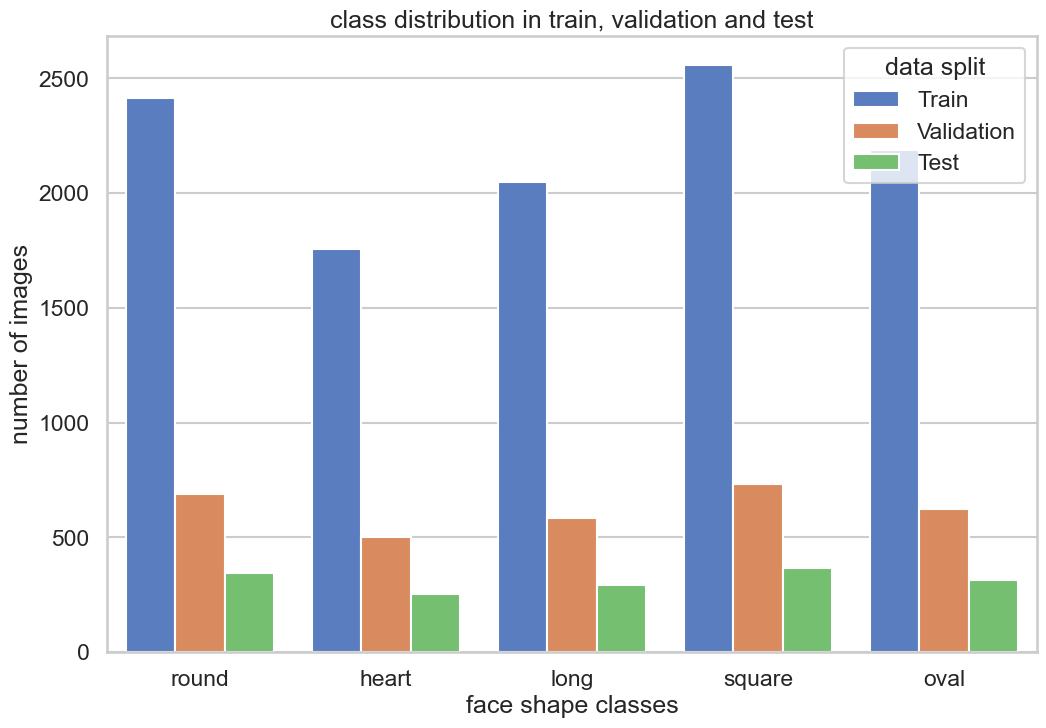

In [9]:
#visualize distribution per split
#countplot
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, x='label', hue='split', palette='muted')
plt.title('class distribution in train, validation and test')
plt.xlabel('face shape classes')
plt.ylabel('number of images')
plt.legend(title='data split')
plt.show()

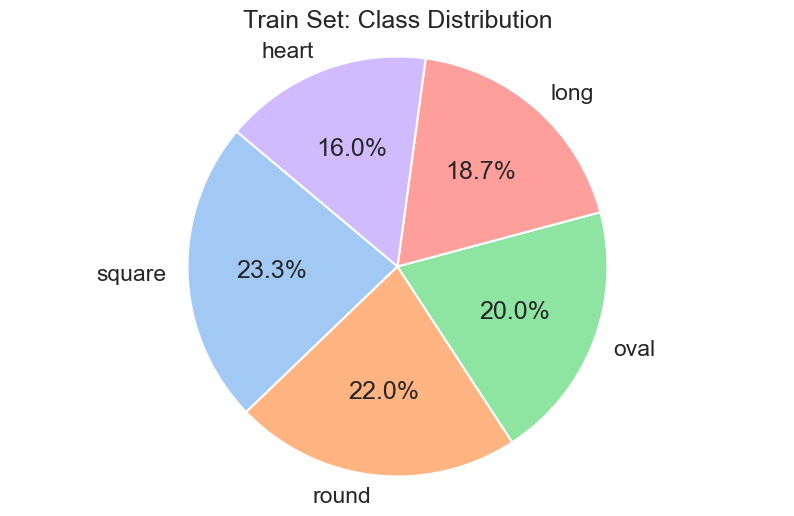

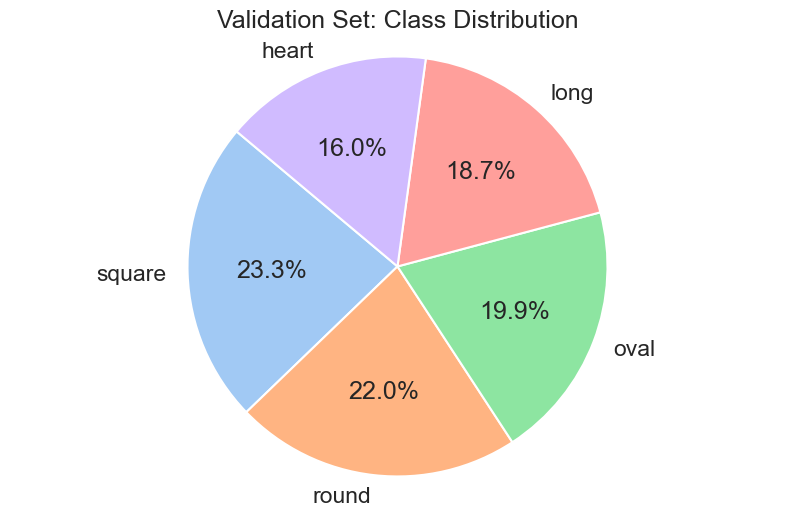

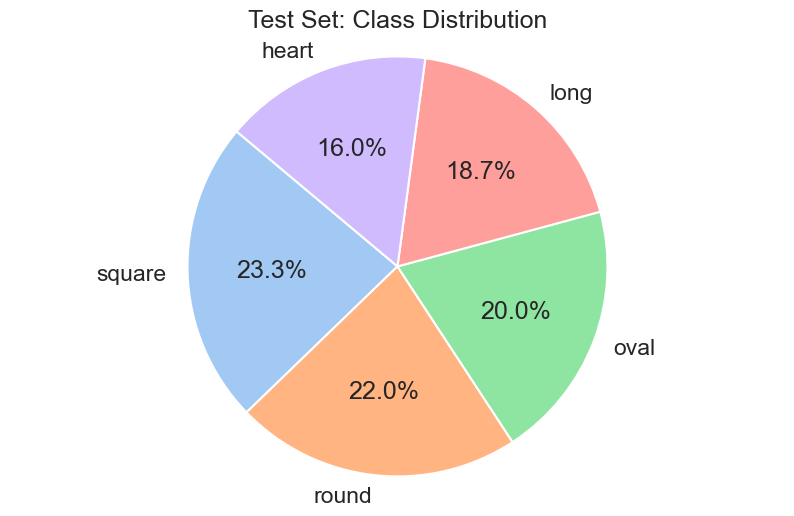

In [10]:
#chart per split for detailed view
splits = ['Train', 'Validation', 'Test']
for s in splits:
    subset = combined_df[combined_df['split'] == s]
    counts = subset['label'].value_counts()
    labels = counts.index.tolist()
    sizes = counts.tolist()
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax.axis('equal')
    plt.title(f"{s} Set: Class Distribution")
    plt.show()

In [7]:
# -----------------------------
# Step 4: Additional Analysis - Display Sample Images
# -----------------------------
# Helper function to display images in a grid
def display_images(image_paths, title, cols=5):
    rows = (len(image_paths) + cols - 1) // cols
    plt.figure(figsize=(15, 3 * rows))
    for i, path in enumerate(image_paths):
        plt.subplot(rows, cols, i + 1)
        try:
            image = Image.open(path)
            plt.imshow(image)
            plt.axis("off")
        except Exception as e:
            print(f"Error loading image {path}: {e}")
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

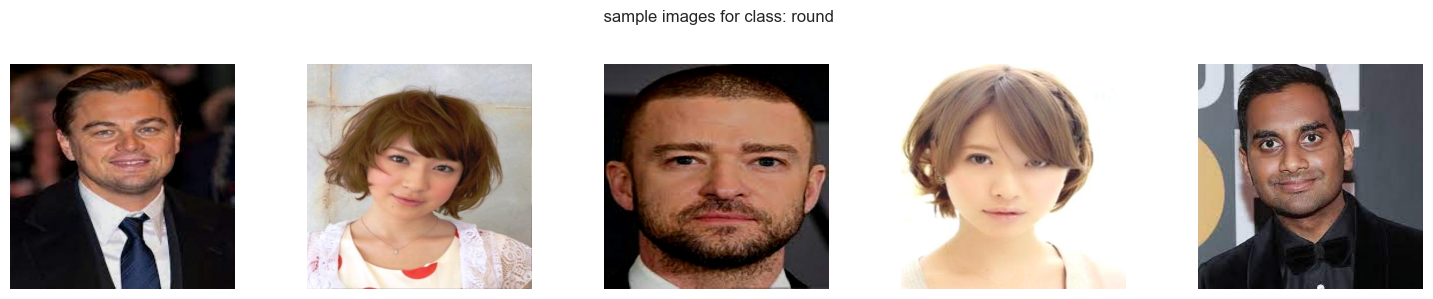

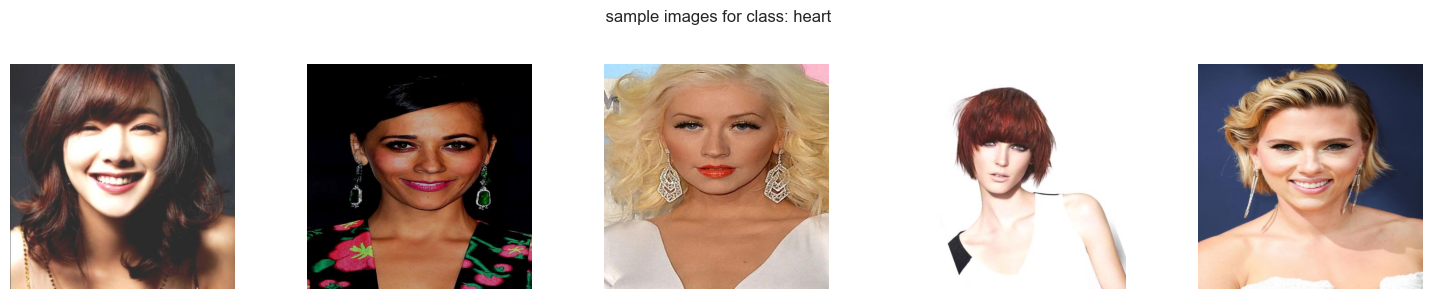

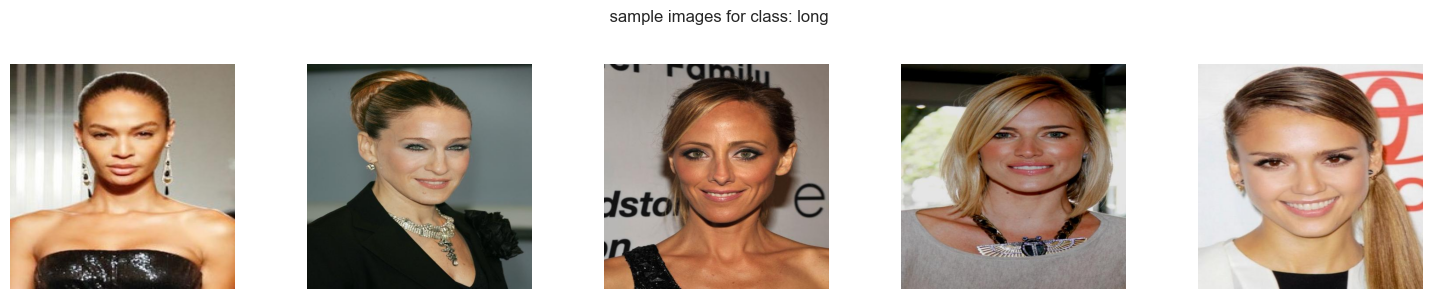

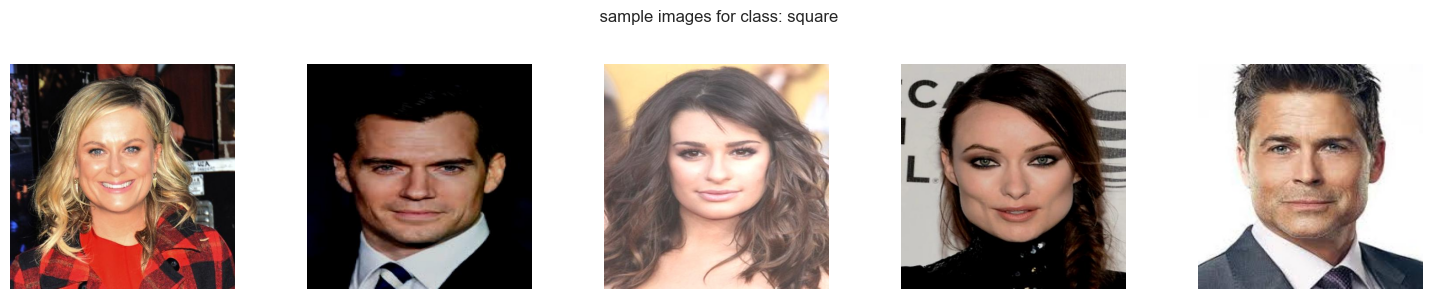

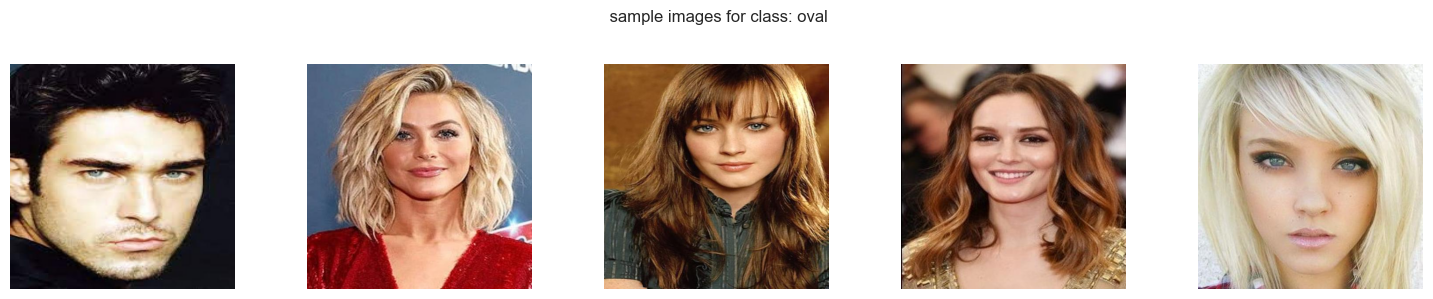

In [8]:
# from each class of train, select 5 random sample images
unique_classes = train_df['label'].unique()
for cls in unique_classes:
    sample_paths = train_df[train_df['label'] == cls]['filepath'].tolist()
    sample_paths = random.sample(sample_paths, min(5, len(sample_paths)))
    display_images(sample_paths, title=f' sample images for class: {cls}')

transformation and augmentations

In [9]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [10]:
#configuration
IMAGE_SIZE = 224
BATCH_SIZE = 64
NUM_WORKERS = 0
CSV_PATHS = {
    "train": "train_data.csv",
    "val": "val_data.csv",
    "test": "test_data.csv"
}

train_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),

    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),

    transforms.RandomAffine(
        degrees=10,
        translate=(0.05, 0.05)
    ),

    transforms.ColorJitter(
        brightness=0.15,
        contrast=0.15,
        saturation=0.1,
        hue=0.02
    ),

    transforms.RandomGrayscale(p=0.05),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),

    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


# ========================
# Custom Dataset Class
# ========================
class FaceShapeDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

        # Encode labels to integers
        self.label_to_idx = {label: idx for idx, label in enumerate(sorted(self.data['label'].unique()))}
        self.idx_to_label = {idx: label for label, idx in self.label_to_idx.items()}
        self.data['label_idx'] = self.data['label'].map(self.label_to_idx)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx]['filepath']
        label = self.data.iloc[idx]['label_idx']
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label


# ========================
# DataLoader Setup
# ========================
def get_dataloaders():
    train_dataset = FaceShapeDataset(CSV_PATHS["train"], transform=train_transforms)
    val_dataset = FaceShapeDataset(CSV_PATHS["val"], transform=val_test_transforms)
    test_dataset = FaceShapeDataset(CSV_PATHS["test"], transform=val_test_transforms)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

    return train_loader, val_loader, test_loader, train_dataset.idx_to_label


        

In [11]:
train_loader, val_loader, test_loader, idx_to_label = get_dataloaders()
print('dataloaders ready :D')

dataloaders ready :D


In [12]:
#preview first batch
images, labels = next(iter(train_loader))
print(f'image batch shape: {images.shape}')
print(f'labels: {labels[:10]}')
print(f'decoded labels: {[idx_to_label[int(lbl)] for lbl in labels[:10]]}')

image batch shape: torch.Size([64, 3, 224, 224])
labels: tensor([1, 1, 1, 2, 2, 3, 3, 3, 4, 4])
decoded labels: ['long', 'long', 'long', 'oval', 'oval', 'round', 'round', 'round', 'square', 'square']


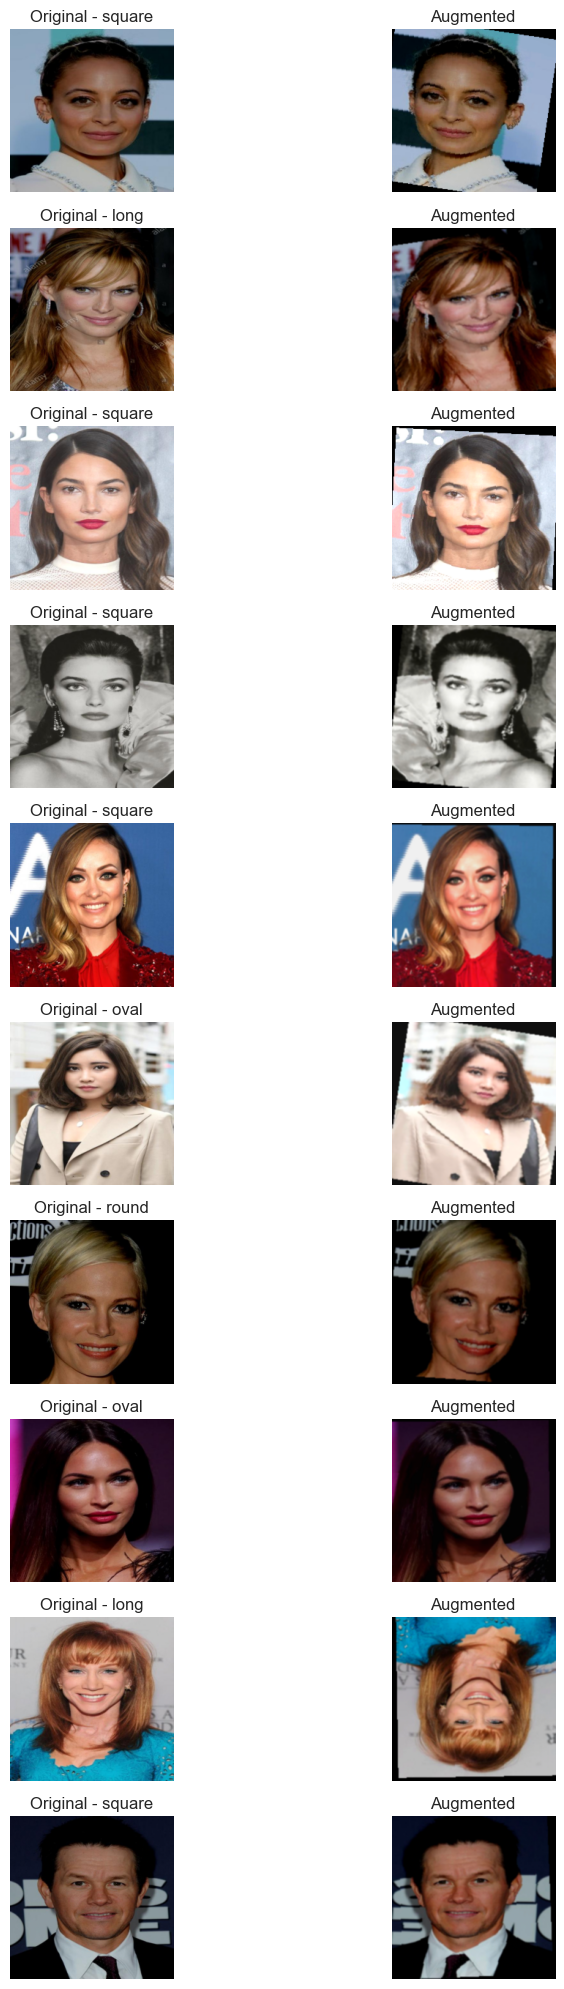

In [13]:
# Use existing config

IMAGE_SIZE = 224
CSV_PATH = "train_data.csv"

# ----------------------------
# Define transforms
# ----------------------------
original_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE))
])

# Your existing augmentation pipeline
augmented_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomAffine(degrees=10, translate=(0.05, 0.05)),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.1, hue=0.02),
    transforms.RandomGrayscale(p=0.05),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
])

# ----------------------------
# Load and sample data
# ----------------------------
df = pd.read_csv(CSV_PATH)
sample_df = df.sample(n=10, random_state=42).reset_index(drop=True)

# ----------------------------
# Show original vs augmented
# ----------------------------
plt.figure(figsize=(10, 20))
for i, row in sample_df.iterrows():
    img_path = row['filepath']
    label = row['label']
    img = Image.open(img_path).convert("RGB")
    
    original = original_transform(img)
    augmented = augmented_transform(img)

    # Original
    plt.subplot(10, 2, 2 * i + 1)
    plt.imshow(original)
    plt.title(f"Original - {label}")
    plt.axis("off")

    # Augmented
    plt.subplot(10, 2, 2 * i + 2)
    plt.imshow(augmented)
    plt.title("Augmented")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [15]:
print(torch.__version__)

2.7.0+cu118


In [16]:
# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")
    # Get the current device
    current_device = torch.cuda.current_device()
    print(f"Current CUDA device: {current_device}")

    # Get the number of GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    # Get the name of the GPU
    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")

CUDA is available!
Current CUDA device: 0
Number of available GPUs: 1
GPU 0: NVIDIA GeForce RTX 4060 Laptop GPU


creating model

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class FaceShapeCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(FaceShapeCNN, self).__init__()

        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # (224x224) -> (224x224)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),  # (224x224) -> (112x112)

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),  # (112x112) -> (56x56)

            # Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),  # (56x56) -> (28x28)

            # Block 4
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),  # (28x28) -> (14x14)

            # Global Average Pooling
            nn.AdaptiveAvgPool2d((1, 1))  # (14x14) -> (1x1)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),               # (256, 1, 1) -> (256)
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [15]:
from torchsummary import summary

In [22]:
#instantiate the model

model = FaceShapeCNN(num_classes=5)

#move to gpu if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

#model summ
print(model)

FaceShapeCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=

In [52]:
summary(model, (3, 224, 224)) # adjusted input shape to 224 * 224 for resized images

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
            Conv2d-4         [-1, 32, 224, 224]           9,248
       BatchNorm2d-5         [-1, 32, 224, 224]              64
              ReLU-6         [-1, 32, 224, 224]               0
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,496
       BatchNorm2d-9         [-1, 64, 112, 112]             128
             ReLU-10         [-1, 64, 112, 112]               0
           Conv2d-11         [-1, 64, 112, 112]          36,928
      BatchNorm2d-12         [-1, 64, 112, 112]             128
             ReLU-13         [-1, 64, 112, 112]               0
        MaxPool2d-14           [-1, 64,

In [53]:
class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0, monitor='loss'):
        """
        patience: How many epochs to wait before stopping.
        verbose: Whether to print progress.
        delta: Minimum change to qualify as an improvement.
        monitor: What to monitor ('loss' or 'accuracy').
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = float('inf') if monitor == 'loss' else -float('inf')  # Initialize based on monitor type
        self.best_epoch = 0
        self.early_stop = False
        self.delta = delta
        self.monitor = monitor  # What to monitor: 'loss' or 'accuracy'

    def __call__(self, val_score, epoch, model_weights, model_name_prefix):
        """
        val_score: The validation loss/accuracy in the current epoch.
        epoch: The current epoch.
        model_weights: The weights of the model (usually model.state_dict()).
        model_name_prefix: The prefix for the model's name (e.g., 'model_1', 'model_2').
        """
        # If monitoring 'loss', we expect the value to decrease
        if self.monitor == 'loss':
            if val_score < self.best_score - self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weights, model_name_prefix)
            else:
                self.counter += 1
        # If monitoring 'accuracy', we expect the value to increase
        elif self.monitor == 'accuracy':
            if val_score > self.best_score + self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weights, model_name_prefix)
            else:
                self.counter += 1

        if self.counter >= self.patience:
            self.early_stop = True
            if self.verbose:
                print(f"Early stopping triggered after {self.counter} epochs of no improvement.")

    def save_best_weights(self, model_weights, model_name_prefix):
        """
        Save the model weights with a unique name for each model.
        model_name_prefix: The prefix for the model's name (e.g., 'model_1', 'model_2').
        """
        model_name = f"{model_name_prefix}_epoch_final_{self.best_epoch + 1}.pkt"

        # Clean up previous saved model files (optional, to avoid disk clutter)
        for file in os.listdir():
            if file.startswith(model_name_prefix) and file != model_name:
                os.remove(file)
                if self.verbose:
                    print(f"🗑️ Deleted old model file: {file}")

        torch.save(model_weights, model_name)
        if self.verbose:
            print(f"✅ Best model weights saved to {model_name}.")

In [54]:
#train loop
best_val_loss = float('inf')  # Initialize best validation loss
best_model_weights = None

def train_and_validate(model, train_loader, valid_loader, optimizer, scheduler, criterion, model_name_prefix, epochs=25, device=None, early_stopping=None):

    # Store losses and accuracies
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    auc_scores = []

    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        print('-' * 50)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            # Ensure labels are Long for CrossEntropyLoss
            labels = labels.long()  # Cast labels to Long

            # Mixed precision forward pass
            with torch.amp.autocast('cuda'):

                raw_outputs = model(inputs)  # Get raw logits (not passed through softmax)
                loss = criterion(raw_outputs, labels)  # Compute loss

            # Backward pass with mixed precision
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item() * inputs.size(0)

            # Compute predictions (Get class with highest logit)
            with torch.no_grad():
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store training loss and accuracy
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Ensure labels are Long for CrossEntropyLoss
                labels = labels.long()  # Cast labels to Long

                with torch.amp.autocast('cuda'):
                    raw_outputs = model(inputs)  # Get raw logits
                    loss = criterion(raw_outputs, labels)  # Compute loss

                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
                correct_preds += torch.sum(preds == labels.data)
                total_preds += labels.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_loss = running_loss / len(valid_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Validation Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store validation loss and accuracy
        valid_losses.append(epoch_loss)
        valid_accuracies.append(epoch_acc.item())


        # Step the scheduler based on validation loss
        scheduler.step(epoch_loss)

        # ✅ Early stopping check: save model based on validation loss
        if early_stopping is not None:
            early_stopping(epoch_loss, epoch, model.state_dict(), model_name_prefix="model")
            if early_stopping.early_stop:
                print(f"🚨 Early stopping triggered at epoch {epoch+1}.")
                break

        # ✅ Display confusion matrix & classification report every 5 epochs
        if epoch % 5 == 0 or early_stopping.early_stop:
            cm = confusion_matrix(all_labels, all_preds)
            plot_confusion_matrix(cm, classes=[i for i in range(len(set(all_labels)))])
            print("Classification Report:")
            print(classification_report(all_labels, all_preds))

    # ✅ Load the best model weights from early stopping
    print("Loading best model weights...")
    model.load_state_dict(torch.load("model_epoch_final_{}.pkt".format(early_stopping.best_epoch + 1)))

    # ✅ Plot training metrics
    plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies)


    return model





# Helper function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


# Helper function to plot losses, accuracies, and AUC scores
def plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(16, 8))

    # Plot training and validation loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, label='Training Loss', color='blue')
    plt.plot(epochs, valid_losses, label='Validation Loss', color='red')
    plt.title('Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', color='blue')
    plt.plot(epochs, valid_accuracies, label='Validation Accuracy', color='red')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()



    plt.tight_layout()
    plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

def test_model(model, test_loader, criterion, device, num_classes=5):
    """
    Evaluates the model on the test set, computes loss and accuracy,
    and displays the confusion matrix and classification report.

    Args:
        model: The trained PyTorch model.
        test_loader: DataLoader for the test set.
        criterion: The loss function used during training (e.g., CrossEntropyLoss).
        device: The device to run inference on (e.g., torch.device('cuda') or torch.device('cpu')).
        num_classes: The number of classes in the classification task.
    """
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Use autocast for mixed precision inference
            with torch.amp.autocast('cuda'):
                raw_outputs = model(inputs)  # Get raw logits from the model
                loss = criterion(raw_outputs, labels)  # Compute loss

            running_loss += loss.item() * inputs.size(0)

            # Get class predictions (highest probability for multi-class)
            _, preds = torch.max(raw_outputs, 1)

            # Update accuracy counters
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

            # Accumulate for metrics
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate overall test loss and accuracy
    test_loss = running_loss / len(test_loader.dataset)
    test_accuracy = correct_preds.double() / total_preds

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Compute confusion matrix and classification report
    cm = confusion_matrix(all_labels, all_preds)
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)]))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import GradScaler


# ✅ Class weights (based on your dataset size)
# Assuming classes like this: [200, 200, 199, 197, 200]
class_counts = torch.tensor([200, 200, 199, 197, 200], dtype=torch.float)
weights = 1.0 / class_counts
weights = weights / weights.sum()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))

# ✅ Optimizer
optimizer = optim.AdamW(
    model.parameters(),
    lr=2e-4,              # Raised for better initial learning
    weight_decay=2e-4     # Softer regularization
)

# ✅ LR Scheduler
scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,           # More aggressive drop
    patience=3,           # React quicker to plateaus
    threshold=0.001,
    #verbose=True
)

# ✅ AMP for speed
scaler = GradScaler()

# ✅ Epochs
num_epochs = 110

print(f"✅ Model Initialized on {device}")

✅ Model Initialized on cuda


C:\Users\USER\AppData\Local\Temp\ipykernel_15220\494326155.py:33: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Epoch 1/110
--------------------------------------------------
Training Loss: 1.6128, Accuracy: 0.2269
Validation Loss: 1.5855, Accuracy: 0.2530
🗑️ Deleted old model file: model_epoch_100.pkt
🗑️ Deleted old model file: model_resnet_epoch_42.pth
✅ Best model weights saved to model_epoch_final_1.pkt.


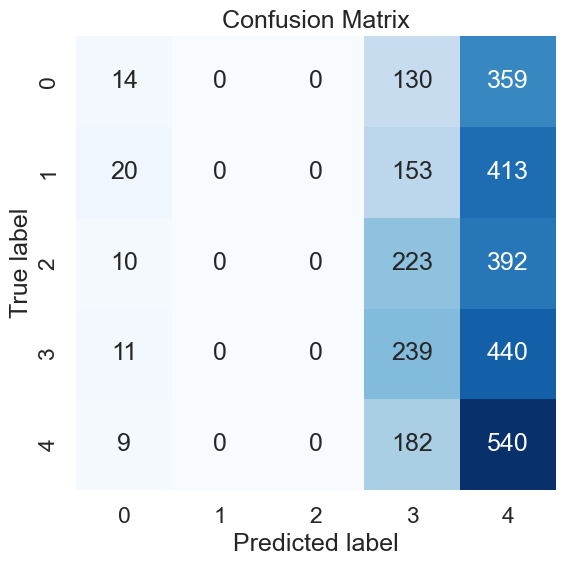

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.03      0.05       503
           1       0.00      0.00      0.00       586
           2       0.00      0.00      0.00       625
           3       0.26      0.35      0.30       690
           4       0.25      0.74      0.38       731

    accuracy                           0.25      3135
   macro avg       0.15      0.22      0.14      3135
weighted avg       0.15      0.25      0.16      3135

Epoch 2/110
--------------------------------------------------


C:\Users\USER\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Training Loss: 1.5941, Accuracy: 0.2481
Validation Loss: 1.5838, Accuracy: 0.2587
🗑️ Deleted old model file: model_epoch_final_1.pkt
✅ Best model weights saved to model_epoch_final_2.pkt.
Epoch 3/110
--------------------------------------------------
Training Loss: 1.5897, Accuracy: 0.2569
Validation Loss: 1.5792, Accuracy: 0.2545
🗑️ Deleted old model file: model_epoch_final_2.pkt
✅ Best model weights saved to model_epoch_final_3.pkt.
Epoch 4/110
--------------------------------------------------
Training Loss: 1.5809, Accuracy: 0.2659
Validation Loss: 1.5692, Accuracy: 0.2740
🗑️ Deleted old model file: model_epoch_final_3.pkt
✅ Best model weights saved to model_epoch_final_4.pkt.
Epoch 5/110
--------------------------------------------------
Training Loss: 1.5707, Accuracy: 0.2819
Validation Loss: 1.5969, Accuracy: 0.2555
Epoch 6/110
--------------------------------------------------
Training Loss: 1.5613, Accuracy: 0.2869
Validation Loss: 1.5498, Accuracy: 0.2931
🗑️ Deleted old model

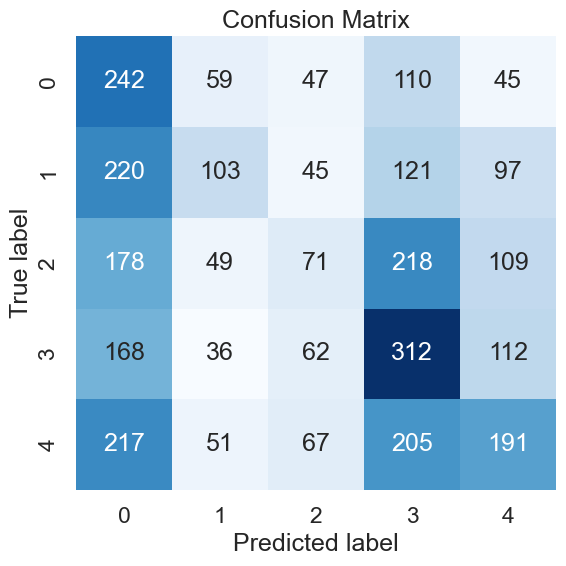

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.48      0.32       503
           1       0.35      0.18      0.23       586
           2       0.24      0.11      0.15       625
           3       0.32      0.45      0.38       690
           4       0.34      0.26      0.30       731

    accuracy                           0.29      3135
   macro avg       0.30      0.30      0.28      3135
weighted avg       0.30      0.29      0.28      3135

Epoch 7/110
--------------------------------------------------
Training Loss: 1.5430, Accuracy: 0.3019
Validation Loss: 1.5151, Accuracy: 0.3413
🗑️ Deleted old model file: model_epoch_final_6.pkt
✅ Best model weights saved to model_epoch_final_7.pkt.
Epoch 8/110
--------------------------------------------------
Training Loss: 1.5263, Accuracy: 0.3122
Validation Loss: 1.5821, Accuracy: 0.2823
Epoch 9/110
--------------------------------------------------
Training Loss: 1.5030, Accura

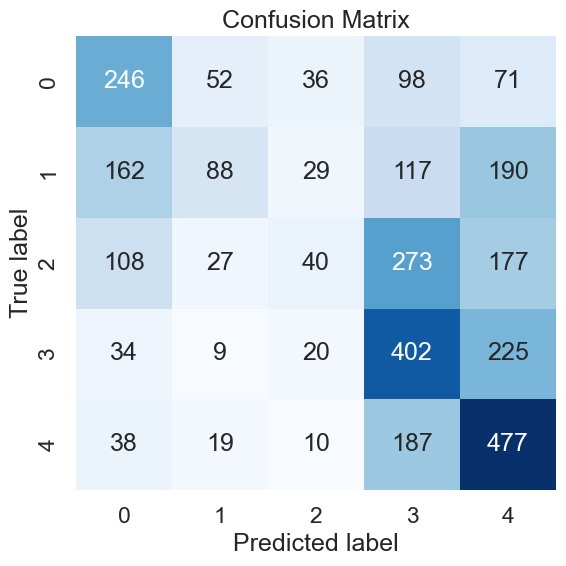

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.49      0.45       503
           1       0.45      0.15      0.23       586
           2       0.30      0.06      0.11       625
           3       0.37      0.58      0.46       690
           4       0.42      0.65      0.51       731

    accuracy                           0.40      3135
   macro avg       0.39      0.39      0.35      3135
weighted avg       0.39      0.40      0.35      3135

Epoch 12/110
--------------------------------------------------
Training Loss: 1.4464, Accuracy: 0.3687
Validation Loss: 1.5463, Accuracy: 0.3215
Epoch 13/110
--------------------------------------------------
Training Loss: 1.4208, Accuracy: 0.3857
Validation Loss: 1.5769, Accuracy: 0.3295
Epoch 14/110
--------------------------------------------------
Training Loss: 1.4000, Accuracy: 0.3971
Validation Loss: 1.4408, Accuracy: 0.3729
Epoch 15/110
-------------------------------------

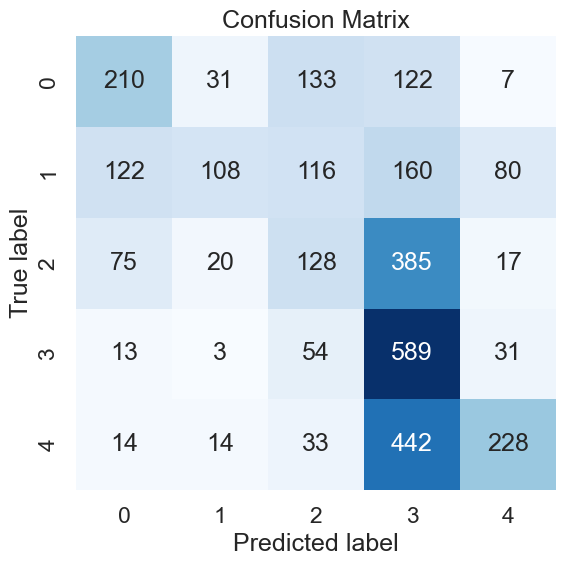

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.42      0.45       503
           1       0.61      0.18      0.28       586
           2       0.28      0.20      0.24       625
           3       0.35      0.85      0.49       690
           4       0.63      0.31      0.42       731

    accuracy                           0.40      3135
   macro avg       0.47      0.39      0.38      3135
weighted avg       0.47      0.40      0.38      3135

Epoch 17/110
--------------------------------------------------
Training Loss: 1.3114, Accuracy: 0.4446
Validation Loss: 1.5373, Accuracy: 0.3560
Epoch 18/110
--------------------------------------------------
Training Loss: 1.3047, Accuracy: 0.4511
Validation Loss: 1.3786, Accuracy: 0.4348
Epoch 19/110
--------------------------------------------------
Training Loss: 1.2812, Accuracy: 0.4664
Validation Loss: 1.2099, Accuracy: 0.5011
🗑️ Deleted old model file: model_epoch_final_16.pk

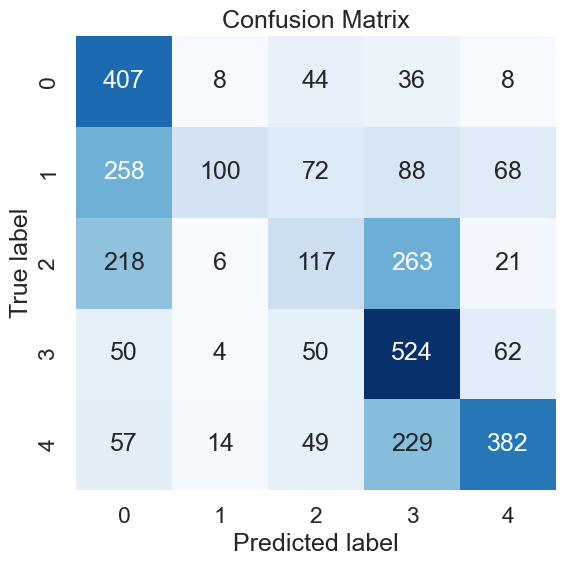

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.81      0.55       503
           1       0.76      0.17      0.28       586
           2       0.35      0.19      0.24       625
           3       0.46      0.76      0.57       690
           4       0.71      0.52      0.60       731

    accuracy                           0.49      3135
   macro avg       0.54      0.49      0.45      3135
weighted avg       0.54      0.49      0.45      3135

Epoch 22/110
--------------------------------------------------
Training Loss: 1.2340, Accuracy: 0.4902
Validation Loss: 1.2353, Accuracy: 0.4616
Epoch 23/110
--------------------------------------------------
Training Loss: 1.2080, Accuracy: 0.4995
Validation Loss: 1.2946, Accuracy: 0.4781
Epoch 24/110
--------------------------------------------------
Training Loss: 1.1914, Accuracy: 0.5066
Validation Loss: 1.1769, Accuracy: 0.5250
🗑️ Deleted old model file: model_epoch_final_21.pk

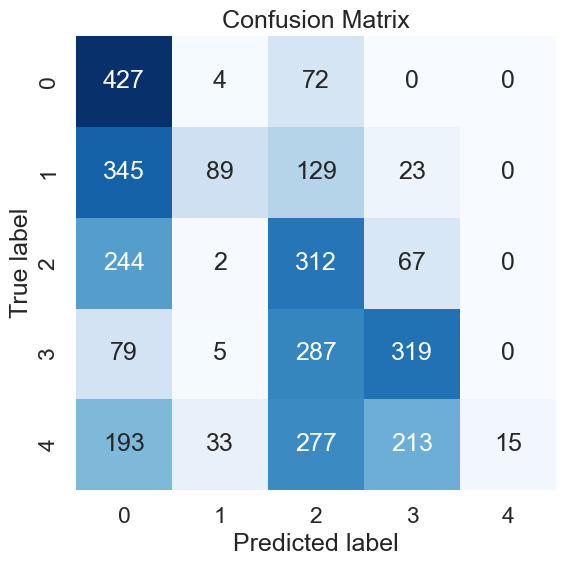

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.85      0.48       503
           1       0.67      0.15      0.25       586
           2       0.29      0.50      0.37       625
           3       0.51      0.46      0.49       690
           4       1.00      0.02      0.04       731

    accuracy                           0.37      3135
   macro avg       0.56      0.40      0.32      3135
weighted avg       0.58      0.37      0.31      3135

Epoch 27/110
--------------------------------------------------
Training Loss: 1.1548, Accuracy: 0.5281
Validation Loss: 1.1191, Accuracy: 0.5324
🗑️ Deleted old model file: model_epoch_final_24.pkt
✅ Best model weights saved to model_epoch_final_27.pkt.
Epoch 28/110
--------------------------------------------------
Training Loss: 1.1387, Accuracy: 0.5376
Validation Loss: 1.2601, Accuracy: 0.4874
Epoch 29/110
--------------------------------------------------
Training Loss: 1.1288, A

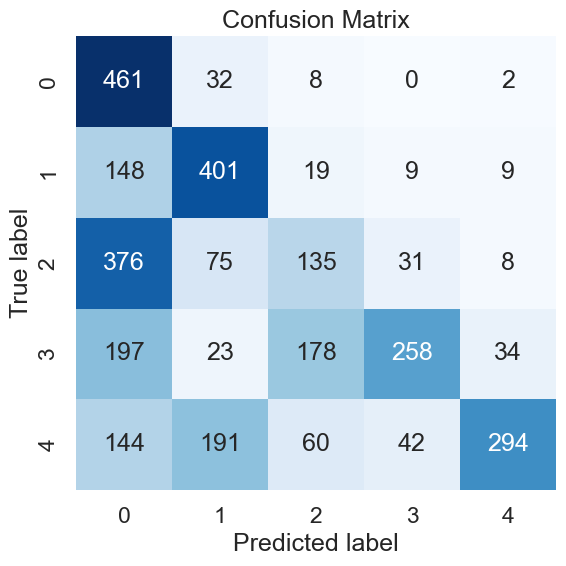

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.92      0.50       503
           1       0.56      0.68      0.61       586
           2       0.34      0.22      0.26       625
           3       0.76      0.37      0.50       690
           4       0.85      0.40      0.55       731

    accuracy                           0.49      3135
   macro avg       0.57      0.52      0.49      3135
weighted avg       0.59      0.49      0.49      3135

Epoch 32/110
--------------------------------------------------
Training Loss: 1.0541, Accuracy: 0.5771
Validation Loss: 1.0528, Accuracy: 0.5595
🗑️ Deleted old model file: model_epoch_final_27.pkt
✅ Best model weights saved to model_epoch_final_32.pkt.
Epoch 33/110
--------------------------------------------------
Training Loss: 1.0307, Accuracy: 0.5850
Validation Loss: 1.1627, Accuracy: 0.5244
Epoch 34/110
--------------------------------------------------
Training Loss: 1.0200, A

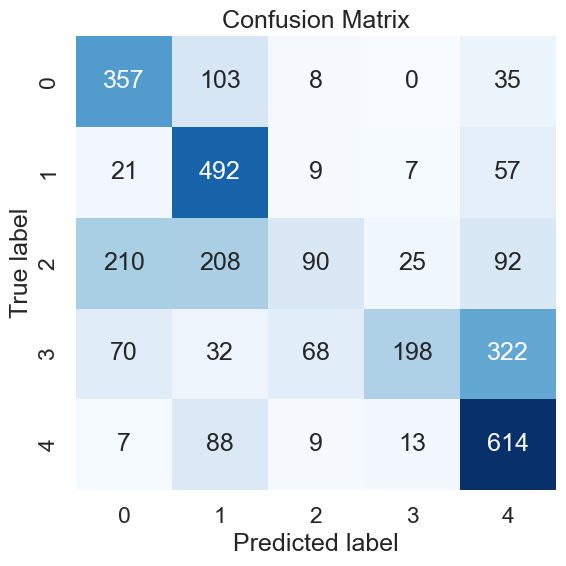

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.71      0.61       503
           1       0.53      0.84      0.65       586
           2       0.49      0.14      0.22       625
           3       0.81      0.29      0.42       690
           4       0.55      0.84      0.66       731

    accuracy                           0.56      3135
   macro avg       0.58      0.56      0.51      3135
weighted avg       0.59      0.56      0.51      3135

Epoch 37/110
--------------------------------------------------
Training Loss: 0.9973, Accuracy: 0.6024
Validation Loss: 0.8844, Accuracy: 0.6472
🗑️ Deleted old model file: model_epoch_final_34.pkt
✅ Best model weights saved to model_epoch_final_37.pkt.
Epoch 38/110
--------------------------------------------------
Training Loss: 0.9782, Accuracy: 0.6136
Validation Loss: 1.6236, Accuracy: 0.4220
Epoch 39/110
--------------------------------------------------
Training Loss: 0.9702, A

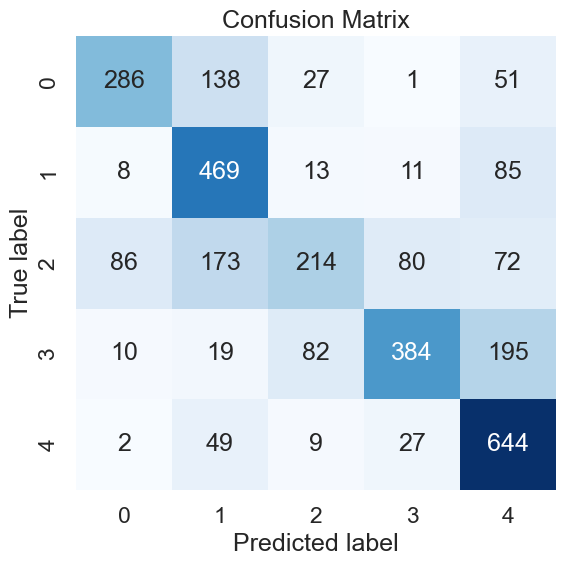

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.57      0.64       503
           1       0.55      0.80      0.65       586
           2       0.62      0.34      0.44       625
           3       0.76      0.56      0.64       690
           4       0.62      0.88      0.72       731

    accuracy                           0.64      3135
   macro avg       0.66      0.63      0.62      3135
weighted avg       0.66      0.64      0.62      3135

Epoch 42/110
--------------------------------------------------
Training Loss: 0.9268, Accuracy: 0.6352
Validation Loss: 0.8861, Accuracy: 0.6453
Epoch 43/110
--------------------------------------------------
Training Loss: 0.9196, Accuracy: 0.6384
Validation Loss: 0.7991, Accuracy: 0.6730
🗑️ Deleted old model file: model_epoch_final_37.pkt
✅ Best model weights saved to model_epoch_final_43.pkt.
Epoch 44/110
--------------------------------------------------
Training Loss: 0.9087, A

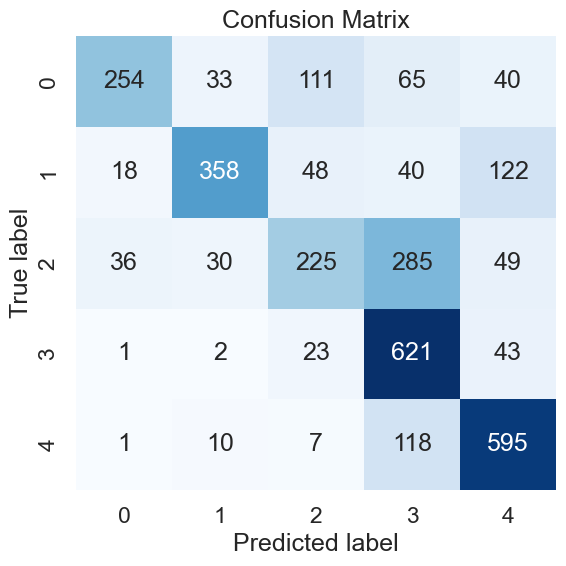

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.50      0.62       503
           1       0.83      0.61      0.70       586
           2       0.54      0.36      0.43       625
           3       0.55      0.90      0.68       690
           4       0.70      0.81      0.75       731

    accuracy                           0.65      3135
   macro avg       0.69      0.64      0.64      3135
weighted avg       0.68      0.65      0.64      3135

Epoch 47/110
--------------------------------------------------
Training Loss: 0.8913, Accuracy: 0.6550
Validation Loss: 0.7929, Accuracy: 0.6880
Epoch 48/110
--------------------------------------------------
Training Loss: 0.8991, Accuracy: 0.6450
Validation Loss: 0.7671, Accuracy: 0.6963
🗑️ Deleted old model file: model_epoch_final_44.pkt
✅ Best model weights saved to model_epoch_final_48.pkt.
Epoch 49/110
--------------------------------------------------
Training Loss: 0.9040, A

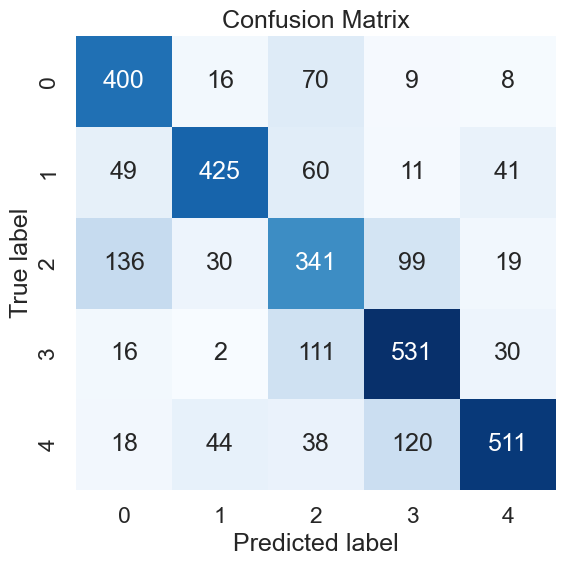

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.80      0.71       503
           1       0.82      0.73      0.77       586
           2       0.55      0.55      0.55       625
           3       0.69      0.77      0.73       690
           4       0.84      0.70      0.76       731

    accuracy                           0.70      3135
   macro avg       0.71      0.71      0.70      3135
weighted avg       0.71      0.70      0.71      3135

Epoch 52/110
--------------------------------------------------
Training Loss: 0.8802, Accuracy: 0.6569
Validation Loss: 0.7122, Accuracy: 0.7285
🗑️ Deleted old model file: model_epoch_final_50.pkt
✅ Best model weights saved to model_epoch_final_52.pkt.
Epoch 53/110
--------------------------------------------------
Training Loss: 0.8745, Accuracy: 0.6575
Validation Loss: 0.7164, Accuracy: 0.7238
Epoch 54/110
--------------------------------------------------
Training Loss: 0.8734, A

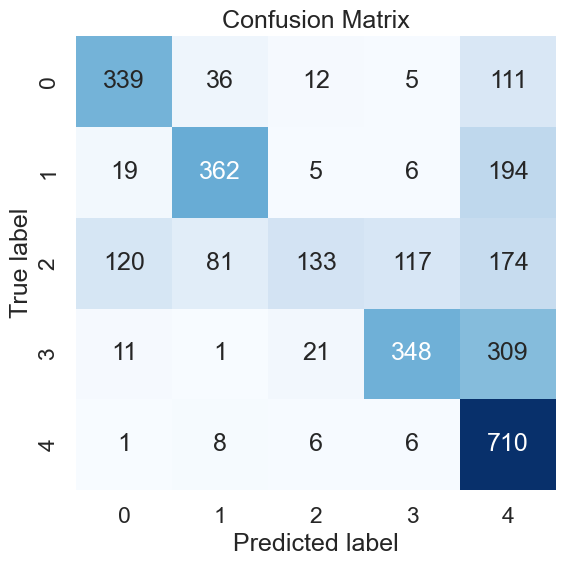

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       503
           1       0.74      0.62      0.67       586
           2       0.75      0.21      0.33       625
           3       0.72      0.50      0.59       690
           4       0.47      0.97      0.64       731

    accuracy                           0.60      3135
   macro avg       0.68      0.60      0.58      3135
weighted avg       0.67      0.60      0.58      3135

Epoch 57/110
--------------------------------------------------
Training Loss: 0.8385, Accuracy: 0.6756
Validation Loss: 0.7720, Accuracy: 0.6979
Epoch 58/110
--------------------------------------------------
Training Loss: 0.8483, Accuracy: 0.6707
Validation Loss: 0.7161, Accuracy: 0.7171
Epoch 59/110
--------------------------------------------------
Training Loss: 0.8503, Accuracy: 0.6726
Validation Loss: 0.7924, Accuracy: 0.6826
Epoch 60/110
-------------------------------------

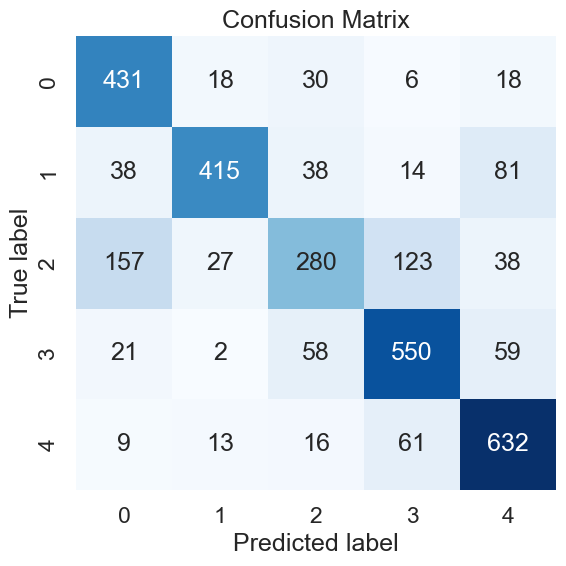

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.86      0.74       503
           1       0.87      0.71      0.78       586
           2       0.66      0.45      0.53       625
           3       0.73      0.80      0.76       690
           4       0.76      0.86      0.81       731

    accuracy                           0.74      3135
   macro avg       0.74      0.73      0.73      3135
weighted avg       0.74      0.74      0.73      3135

Epoch 62/110
--------------------------------------------------
Training Loss: 0.8336, Accuracy: 0.6734
Validation Loss: 0.6936, Accuracy: 0.7250
Epoch 63/110
--------------------------------------------------
Training Loss: 0.8285, Accuracy: 0.6800
Validation Loss: 0.6974, Accuracy: 0.7327
Epoch 64/110
--------------------------------------------------
Training Loss: 0.8208, Accuracy: 0.6827
Validation Loss: 0.6719, Accuracy: 0.7388
🗑️ Deleted old model file: model_epoch_final_61.pk

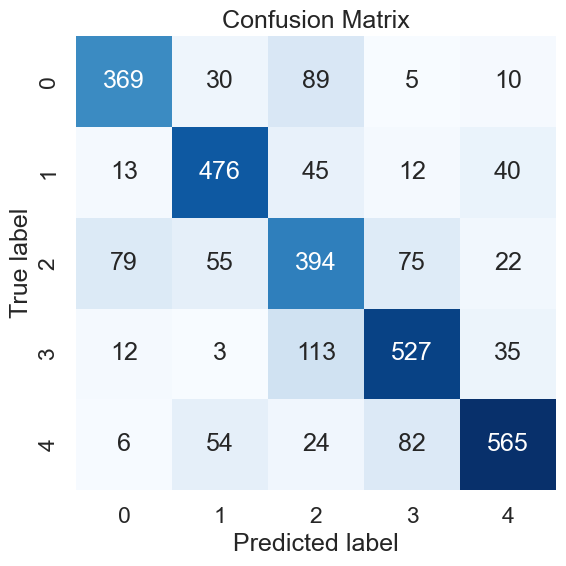

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       503
           1       0.77      0.81      0.79       586
           2       0.59      0.63      0.61       625
           3       0.75      0.76      0.76       690
           4       0.84      0.77      0.81       731

    accuracy                           0.74      3135
   macro avg       0.75      0.74      0.74      3135
weighted avg       0.75      0.74      0.74      3135

Epoch 67/110
--------------------------------------------------
Training Loss: 0.8218, Accuracy: 0.6798
Validation Loss: 0.6927, Accuracy: 0.7270
Epoch 68/110
--------------------------------------------------
Training Loss: 0.8190, Accuracy: 0.6828
Validation Loss: 0.7371, Accuracy: 0.7120
Epoch 69/110
--------------------------------------------------
Training Loss: 0.8160, Accuracy: 0.6856
Validation Loss: 0.6851, Accuracy: 0.7340
Epoch 70/110
-------------------------------------

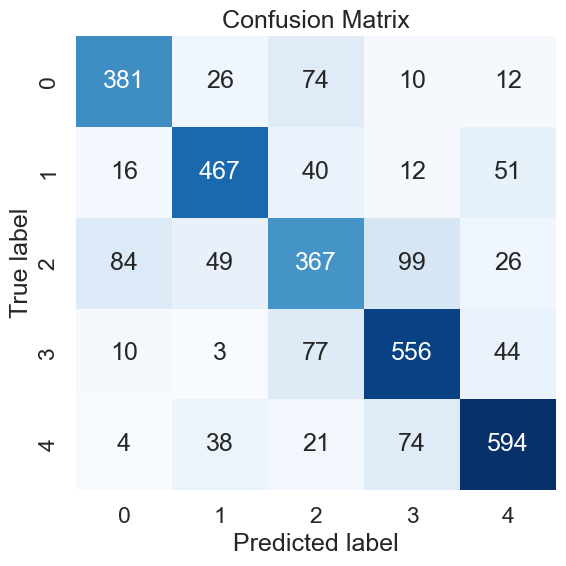

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       503
           1       0.80      0.80      0.80       586
           2       0.63      0.59      0.61       625
           3       0.74      0.81      0.77       690
           4       0.82      0.81      0.81       731

    accuracy                           0.75      3135
   macro avg       0.75      0.75      0.75      3135
weighted avg       0.75      0.75      0.75      3135

Epoch 72/110
--------------------------------------------------
Training Loss: 0.8050, Accuracy: 0.6905
Validation Loss: 0.6385, Accuracy: 0.7579
Epoch 73/110
--------------------------------------------------
Training Loss: 0.7998, Accuracy: 0.6906
Validation Loss: 0.6499, Accuracy: 0.7553
Epoch 74/110
--------------------------------------------------
Training Loss: 0.7955, Accuracy: 0.6896
Validation Loss: 0.6443, Accuracy: 0.7550
Epoch 75/110
-------------------------------------

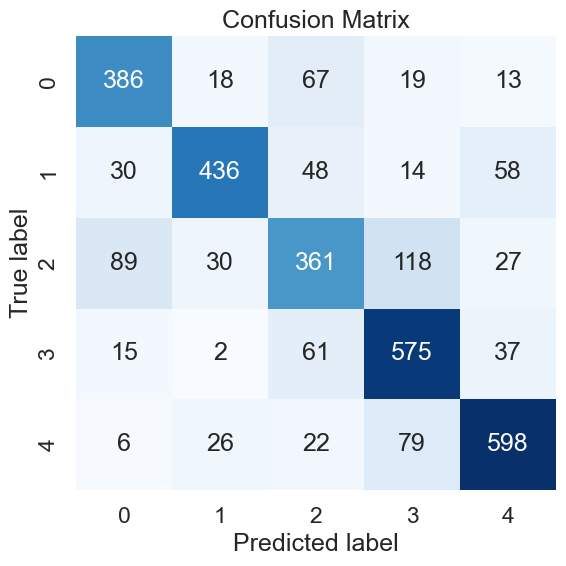

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       503
           1       0.85      0.74      0.79       586
           2       0.65      0.58      0.61       625
           3       0.71      0.83      0.77       690
           4       0.82      0.82      0.82       731

    accuracy                           0.75      3135
   macro avg       0.75      0.75      0.75      3135
weighted avg       0.75      0.75      0.75      3135

Epoch 77/110
--------------------------------------------------
Training Loss: 0.7950, Accuracy: 0.6936
Validation Loss: 0.6350, Accuracy: 0.7544
🗑️ Deleted old model file: model_epoch_final_71.pkt
✅ Best model weights saved to model_epoch_final_77.pkt.
Epoch 78/110
--------------------------------------------------
Training Loss: 0.7976, Accuracy: 0.6919
Validation Loss: 0.6272, Accuracy: 0.7569
🗑️ Deleted old model file: model_epoch_final_77.pkt
✅ Best model weights saved to model_

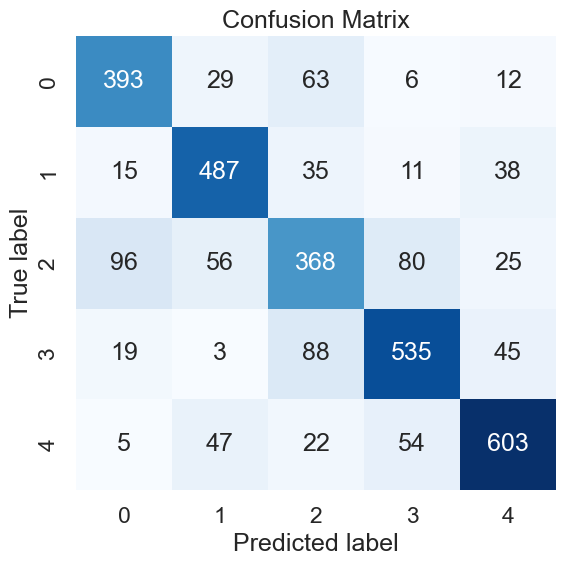

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       503
           1       0.78      0.83      0.81       586
           2       0.64      0.59      0.61       625
           3       0.78      0.78      0.78       690
           4       0.83      0.82      0.83       731

    accuracy                           0.76      3135
   macro avg       0.76      0.76      0.76      3135
weighted avg       0.76      0.76      0.76      3135

Epoch 82/110
--------------------------------------------------
Training Loss: 0.7854, Accuracy: 0.6994
Validation Loss: 0.6404, Accuracy: 0.7569
Epoch 83/110
--------------------------------------------------
Training Loss: 0.7947, Accuracy: 0.6999
Validation Loss: 0.6279, Accuracy: 0.7595
Epoch 84/110
--------------------------------------------------
Training Loss: 0.8024, Accuracy: 0.6874
Validation Loss: 0.6251, Accuracy: 0.7643
🗑️ Deleted old model file: model_epoch_final_78.pk

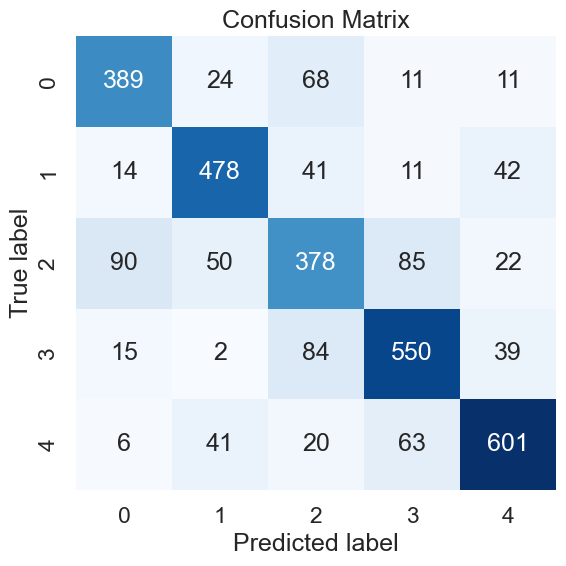

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       503
           1       0.80      0.82      0.81       586
           2       0.64      0.60      0.62       625
           3       0.76      0.80      0.78       690
           4       0.84      0.82      0.83       731

    accuracy                           0.76      3135
   macro avg       0.76      0.76      0.76      3135
weighted avg       0.76      0.76      0.76      3135

Epoch 87/110
--------------------------------------------------
Training Loss: 0.7960, Accuracy: 0.6915
Validation Loss: 0.6263, Accuracy: 0.7611
Epoch 88/110
--------------------------------------------------
Training Loss: 0.7962, Accuracy: 0.6893
Validation Loss: 0.6244, Accuracy: 0.7614
🗑️ Deleted old model file: model_epoch_final_85.pkt
✅ Best model weights saved to model_epoch_final_88.pkt.
Epoch 89/110
--------------------------------------------------
Training Loss: 0.7946, A

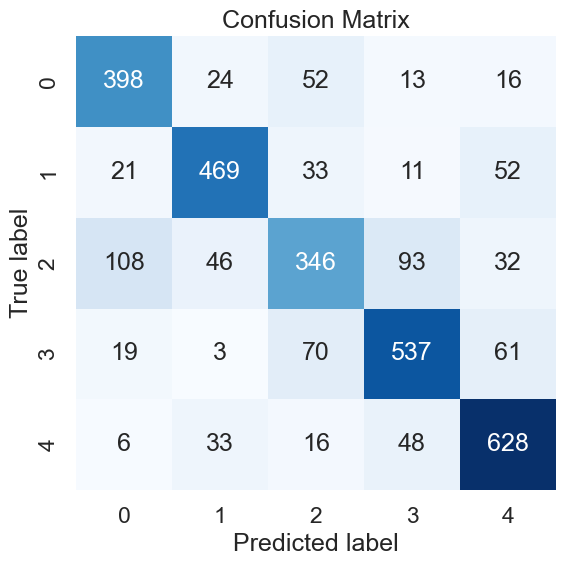

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       503
           1       0.82      0.80      0.81       586
           2       0.67      0.55      0.61       625
           3       0.76      0.78      0.77       690
           4       0.80      0.86      0.83       731

    accuracy                           0.76      3135
   macro avg       0.75      0.76      0.75      3135
weighted avg       0.76      0.76      0.76      3135

Epoch 92/110
--------------------------------------------------
Training Loss: 0.7753, Accuracy: 0.7040
Validation Loss: 0.6242, Accuracy: 0.7579
Epoch 93/110
--------------------------------------------------
Training Loss: 0.7909, Accuracy: 0.6999
Validation Loss: 0.6199, Accuracy: 0.7652
🗑️ Deleted old model file: model_epoch_final_90.pkt
✅ Best model weights saved to model_epoch_final_93.pkt.
Epoch 94/110
--------------------------------------------------
Training Loss: 0.8000, A

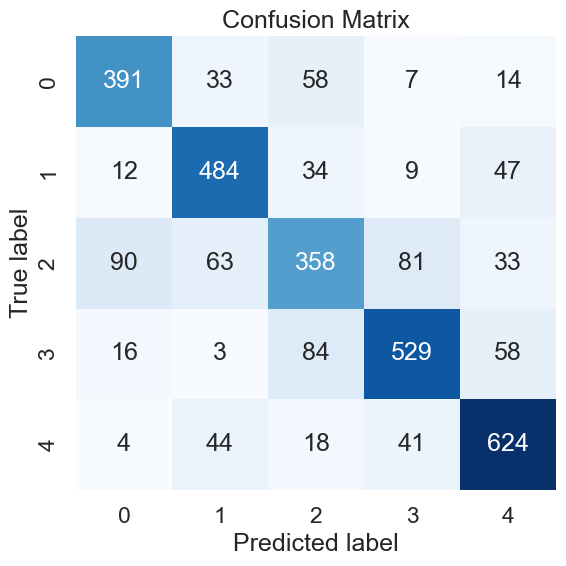

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       503
           1       0.77      0.83      0.80       586
           2       0.65      0.57      0.61       625
           3       0.79      0.77      0.78       690
           4       0.80      0.85      0.83       731

    accuracy                           0.76      3135
   macro avg       0.76      0.76      0.76      3135
weighted avg       0.76      0.76      0.76      3135

Epoch 97/110
--------------------------------------------------
Training Loss: 0.7842, Accuracy: 0.7012
Validation Loss: 0.6223, Accuracy: 0.7604
Epoch 98/110
--------------------------------------------------
Training Loss: 0.7934, Accuracy: 0.6926
Validation Loss: 0.6218, Accuracy: 0.7608
Epoch 99/110
--------------------------------------------------
Training Loss: 0.7924, Accuracy: 0.6942
Validation Loss: 0.6203, Accuracy: 0.7649
Epoch 100/110
------------------------------------

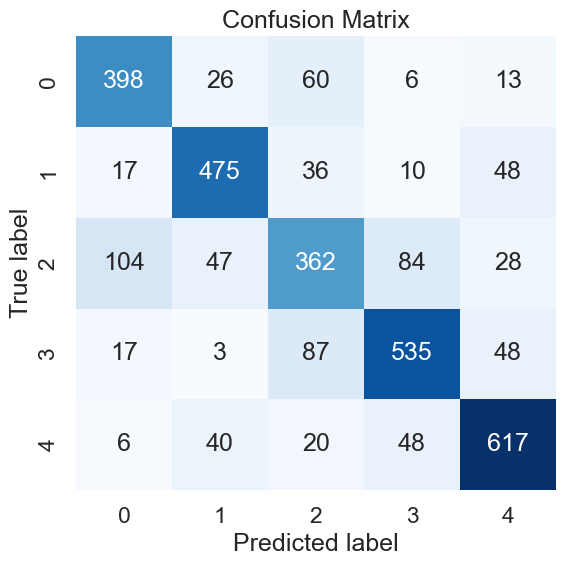

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       503
           1       0.80      0.81      0.81       586
           2       0.64      0.58      0.61       625
           3       0.78      0.78      0.78       690
           4       0.82      0.84      0.83       731

    accuracy                           0.76      3135
   macro avg       0.76      0.76      0.76      3135
weighted avg       0.76      0.76      0.76      3135

Epoch 102/110
--------------------------------------------------
Training Loss: 0.7883, Accuracy: 0.6960
Validation Loss: 0.6201, Accuracy: 0.7643
Epoch 103/110
--------------------------------------------------
Training Loss: 0.7789, Accuracy: 0.7002
Validation Loss: 0.6199, Accuracy: 0.7636
Epoch 104/110
--------------------------------------------------
Training Loss: 0.7791, Accuracy: 0.7052
Validation Loss: 0.6198, Accuracy: 0.7649
🗑️ Deleted old model file: model_epoch_final_93

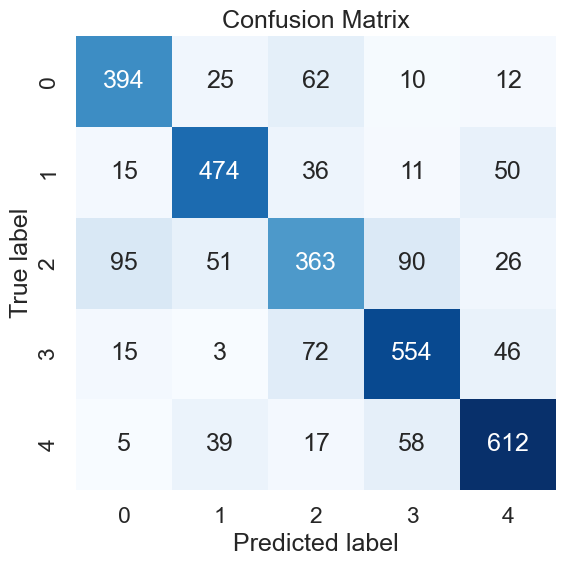

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       503
           1       0.80      0.81      0.80       586
           2       0.66      0.58      0.62       625
           3       0.77      0.80      0.78       690
           4       0.82      0.84      0.83       731

    accuracy                           0.76      3135
   macro avg       0.76      0.76      0.76      3135
weighted avg       0.76      0.76      0.76      3135

Epoch 107/110
--------------------------------------------------
Training Loss: 0.7841, Accuracy: 0.6991
Validation Loss: 0.6209, Accuracy: 0.7598
Epoch 108/110
--------------------------------------------------
Training Loss: 0.7826, Accuracy: 0.6998
Validation Loss: 0.6183, Accuracy: 0.7643
Epoch 109/110
--------------------------------------------------
Training Loss: 0.7891, Accuracy: 0.6985
Validation Loss: 0.6216, Accuracy: 0.7604
Epoch 110/110
---------------------------------

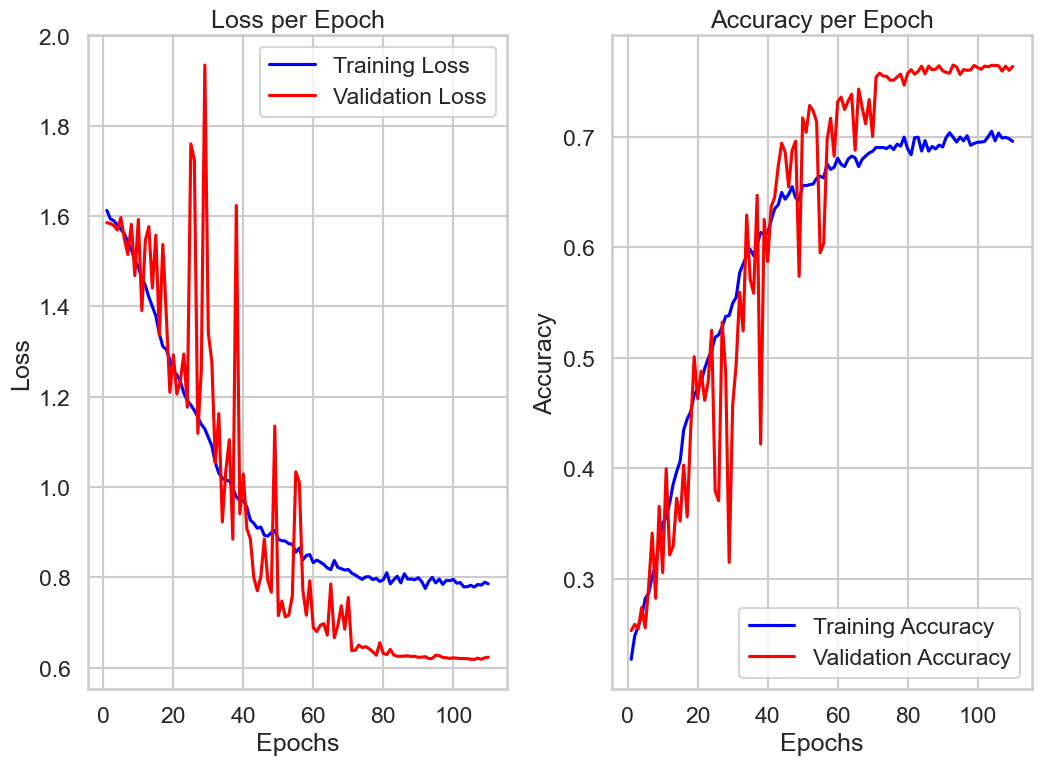

In [57]:
# Example:
early_stopping = EarlyStopping(patience=15, verbose=True, delta=0)
model_name_prefix = "CustomCNN1"  # Or dynamically change this per model
trained_model = train_and_validate(
    model,
    train_loader,
    val_loader,
    optimizer,
    scheduler,
    loss_fn,
    epochs=110,
    device=device,
    early_stopping=early_stopping,
    model_name_prefix=model_name_prefix)

Test Loss: 0.6505, Test Accuracy: 0.7602
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       251
           1       0.77      0.82      0.80       293
           2       0.65      0.56      0.60       313
           3       0.79      0.77      0.78       345
           4       0.81      0.85      0.83       366

    accuracy                           0.76      1568
   macro avg       0.75      0.76      0.76      1568
weighted avg       0.76      0.76      0.76      1568



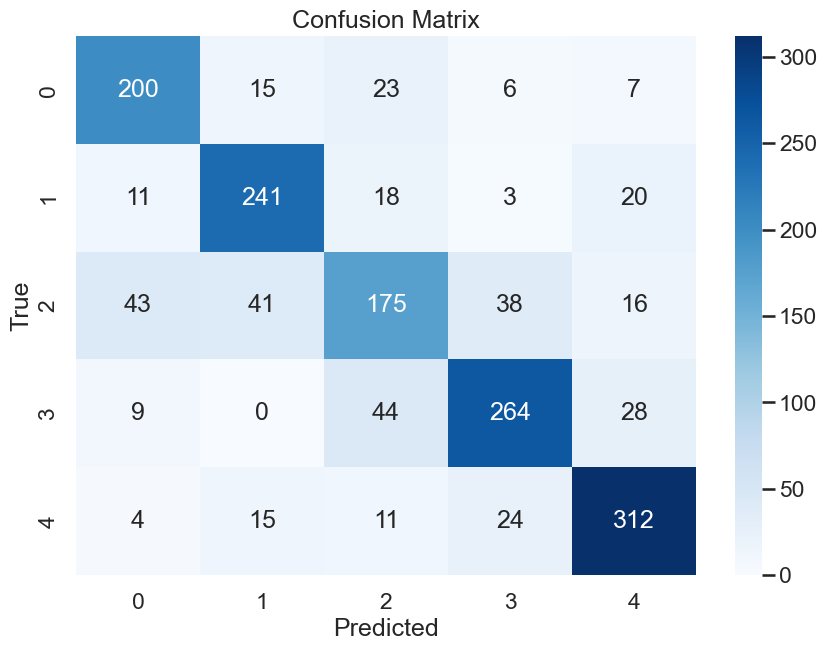

In [58]:
test_model(trained_model, test_loader, loss_fn, device, num_classes=5)

In [59]:
print([idx_to_label[i] for i in range(len(idx_to_label))])  

['heart', 'long', 'oval', 'round', 'square']


In [60]:
print(idx_to_label)
# Output should be something like:
# {0: 'heart', 1: 'long', 2: 'oval', 3: 'round', 4: 'square'}


{0: 'heart', 1: 'long', 2: 'oval', 3: 'round', 4: 'square'}


In [73]:
import os
import torch
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms

#  config
MODEL_PATH = 'model_epoch_final_106.pkt'
TEST_FOLDER = 'largeFaceShape_dataset/test'
SAVE_PATH = 'predictions.txt'
CSV_PATH = 'train_data.csv'
IMAGE_SIZE = 224
NUM_CLASSES = 5

df = pd.read_csv(CSV_PATH)
label_to_idx = {label: idx for idx, label in enumerate(sorted(df['label'].unique()))}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

model = FaceShapeCNN(num_classes=NUM_CLASSES)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.to(device)
model.eval()

def predict_all_images(model, folder_path, save_path):
    results = []
    valid_format = (".jpg", ".jpeg", ".png", ".jfif", ".bmp", ".webp")
    image_count = 0

    for root, _, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(valid_format):
                image_path = os.path.join(root, filename)
                try:
                    img = Image.open(image_path).convert("RGB")
                    img_tensor = transform(img).unsqueeze(0).to(device)
                except Exception as e:
                    print(f"skipped {filename} (error: {e})")
                    continue

                with torch.no_grad():
                    output = model(img_tensor)
                    pred_idx = torch.argmax(output, dim=1).item()
                    pred_label = idx_to_label[pred_idx]

                results.append(f"{filename} --> Predicted: {pred_label}\n")
                image_count += 1

    with open(save_path, 'w') as f:
        f.writelines(results)

    print(f"\n✅ Done! {image_count} images processed.")
    print(f"📄 Predictions saved to: {save_path}")

predict_all_images(model, TEST_FOLDER, SAVE_PATH)



✅ Done! 1313 images processed.
📄 Predictions saved to: predictions.txt


In [67]:
def predict_single_image(model, image_path):
    valid_exts = (".jpg", ".jpeg", ".png", ".jfif", ".bmp", ".webp")
    
    if not image_path.lower().endswith(valid_exts):
        print("❌ invalid image file format.")
        return

    try:
        img = Image.open(image_path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0).to(device)
    except Exception as e:
        print(f"❌ error loading image: {e}")
        return

    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        pred_idx = torch.argmax(output, dim=1).item()
        pred_label = idx_to_label[pred_idx]

    print(f"✅ predicted face shape: {pred_label}")

img_path = 'mine.jpg'
predict_single_image(model, img_path)



✅ predicted face shape: long


In [70]:
def evaluate_from_csv(model, csv_path):
    df = pd.read_csv(csv_path)
    correct = 0
    total = 0

    for _, row in df.iterrows():
        image_path = row['filepath']
        true_label = row['label']

        try:
            img = Image.open(image_path).convert("RGB")
            img_tensor = transform(img).unsqueeze(0).to(device)
        except Exception as e:
            print(f"❌ Skipped {image_path} (error: {e})")
            continue

        with torch.no_grad():
            output = model(img_tensor)
            pred_idx = torch.argmax(output, dim=1).item()
            pred_label = idx_to_label[pred_idx]

        if pred_label == true_label:
            correct += 1
        total += 1

    acc = correct / total if total > 0 else 0
    print(f"\n🎯 Prediction Accuracy from CSV = {acc * 100:.2f}%")


In [71]:
evaluate_from_csv(model, 'test_data.csv')


🎯 Prediction Accuracy from CSV = 75.96%


using resnet18

In [16]:
from torchvision import models

In [17]:
class ResNet18_Faceshape(nn.Module):
    def __init__(self, num_classes=5):
        super(ResNet18_Faceshape, self).__init__()
        self.base_model = models.resnet18(pretrained=True)

        # Freeze earlier layers if we dont wanna fine-tune
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Replace classifier (FC layer)
        num_ftrs = self.base_model.fc.in_features
        self.base_model.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_ftrs, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )
    def forward(self, x):
        return self.base_model(x)

In [18]:
model_resnet = ResNet18_Faceshape(num_classes=5)

C:\Users\USER\PyCharmMiscProject\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\USER\PyCharmMiscProject\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [23]:
model_resnet.to(device)

ResNet18_Faceshape(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=T

In [32]:
class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0, monitor='loss'):
        """
        patience: How many epochs to wait before stopping.
        verbose: Whether to print progress.
        delta: Minimum change to qualify as an improvement.
        monitor: What to monitor ('loss' or 'accuracy').
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = float('inf') if monitor == 'loss' else -float('inf')  # Initialize based on monitor type
        self.best_epoch = 0
        self.early_stop = False
        self.delta = delta
        self.monitor = monitor  # What to monitor: 'loss' or 'accuracy'

    def __call__(self, val_score, epoch, model_weights, model_name_prefix):
        """
        val_score: The validation loss/accuracy in the current epoch.
        epoch: The current epoch.
        model_weights: The weights of the model (usually model.state_dict()).
        model_name_prefix: The prefix for the model's name (e.g., 'model_1', 'model_2').
        """
        # If monitoring 'loss', we expect the value to decrease
        if self.monitor == 'loss':
            if val_score < self.best_score - self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weights, model_name_prefix)
            else:
                self.counter += 1
        # If monitoring 'accuracy', we expect the value to increase
        elif self.monitor == 'accuracy':
            if val_score > self.best_score + self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weights, model_name_prefix)
            else:
                self.counter += 1

        if self.counter >= self.patience:
            self.early_stop = True
            if self.verbose:
                print(f"Early stopping triggered after {self.counter} epochs of no improvement.")

    def save_best_weights(self, model_weights, model_name_prefix):
        """
        Save the model weights with a unique name for each model.
        model_name_prefix: The prefix for the model's name (e.g., 'model_1', 'model_2').
        """
        model_name = f"{model_name_prefix}_epoch_final_{self.best_epoch + 1}.pth"

        torch.save(model_weights, model_name)
        if self.verbose:
            print(f"✅ Best model weights saved to {model_name}.")

In [33]:
#train loop
best_val_loss = float('inf')  # Initialize best validation loss
best_model_weights = None


def train_and_validate(model_resnet, train_loader, valid_loader, optimizer, scheduler, criterion, model_name_prefix, epochs=25,
                       device=None, early_stopping=None):
    # Store losses and accuracies
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    auc_scores = []

    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        print('-' * 50)

        # Training phase
        model_resnet.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            # Ensure labels are Long for CrossEntropyLoss
            labels = labels.long()  # Cast labels to Long

            # Mixed precision forward pass
            with torch.amp.autocast('cuda'):
                raw_outputs = model(inputs)  # Get raw logits (not passed through softmax)
                loss = criterion(raw_outputs, labels)  # Compute loss

            # Backward pass with mixed precision
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item() * inputs.size(0)

            # Compute predictions (Get class with highest logit)
            with torch.no_grad():
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store training loss and accuracy
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Ensure labels are Long for CrossEntropyLoss
                labels = labels.long()  # Cast labels to Long

                with torch.amp.autocast('cuda'):
                    raw_outputs = model(inputs)  # Get raw logits
                    loss = criterion(raw_outputs, labels)  # Compute loss

                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
                correct_preds += torch.sum(preds == labels.data)
                total_preds += labels.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_loss = running_loss / len(valid_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Validation Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store validation loss and accuracy
        valid_losses.append(epoch_loss)
        valid_accuracies.append(epoch_acc.item())

        # Step the scheduler based on validation loss
        scheduler.step(epoch_loss)

        # ✅ Early stopping check: save model based on validation loss
        if early_stopping is not None:
            early_stopping(epoch_loss, epoch, model_resnet.state_dict(), model_name_prefix="model_resnet")
            if early_stopping.early_stop:
                print(f"🚨 Early stopping triggered at epoch {epoch + 1}.")
                break

        # ✅ Display confusion matrix & classification report every 5 epochs
        if epoch % 5 == 0 or early_stopping.early_stop:
            cm = confusion_matrix(all_labels, all_preds)
            plot_confusion_matrix(cm, classes=[i for i in range(len(set(all_labels)))])
            print("Classification Report:")
            print(classification_report(all_labels, all_preds))

    # ✅ Load the best model weights from early stopping
    print("Loading best model weights...")
    model_resnet.load_state_dict(torch.load("model_resnet_epoch_final_{}.pth".format(early_stopping.best_epoch + 1)))

    # ✅ Plot training metrics
    plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies)

    return model_resnet


# Helper function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


# Helper function to plot losses, accuracies, and AUC scores
def plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(16, 8))

    # Plot training and validation loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, label='Training Loss', color='blue')
    plt.plot(epochs, valid_losses, label='Validation Loss', color='red')
    plt.title('Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', color='blue')
    plt.plot(epochs, valid_accuracies, label='Validation Accuracy', color='red')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


from sklearn.metrics import confusion_matrix, classification_report


def test_model(model_resnet, test_loader, criterion, device, num_classes=5):
    """
    Evaluates the model on the test set, computes loss and accuracy,
    and displays the confusion matrix and classification report.

    Args:
        model: The trained PyTorch model.
        test_loader: DataLoader for the test set.
        criterion: The loss function used during training (e.g., CrossEntropyLoss).
        device: The device to run inference on (e.g., torch.device('cuda') or torch.device('cpu')).
        num_classes: The number of classes in the classification task.
    """
    model_resnet.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Use autocast for mixed precision inference
            with torch.amp.autocast('cuda'):
                raw_outputs = model_resnet(inputs)  # Get raw logits from the model
                loss = criterion(raw_outputs, labels)  # Compute loss

            running_loss += loss.item() * inputs.size(0)

            # Get class predictions (highest probability for multi-class)
            _, preds = torch.max(raw_outputs, 1)

            # Update accuracy counters
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

            # Accumulate for metrics
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate overall test loss and accuracy
    test_loss = running_loss / len(test_loader.dataset)
    test_accuracy = correct_preds.double() / total_preds

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Compute confusion matrix and classification report
    cm = confusion_matrix(all_labels, all_preds)
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)]))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(num_classes)],
                yticklabels=[str(i) for i in range(num_classes)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import GradScaler

# ✅ Class weights (based on your dataset size)
# Assuming classes like this: [2315, 2688, 2892, 3215, 3252]
class_counts = torch.tensor([2315, 2688, 2892, 3215, 3252], dtype=torch.float)
weights = 1.0 / class_counts
weights = weights / weights.sum()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))

# ✅ Optimizer
optimizer = optim.AdamW(
    model.parameters(),
    lr=2e-4,  # Raised for better initial learning
    weight_decay=2e-4  # Softer regularization
)

# ✅ LR Scheduler
scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,  # More aggressive drop
    patience=3,  # React quicker to plateaus
    threshold=0.001,
    #verbose=True
)

# ✅ AMP for speed
scaler = GradScaler()

# ✅ Epochs
num_epochs = 110

print(f"✅ Model Initialized on {device}")

✅ Model Initialized on cuda


C:\Users\USER\AppData\Local\Temp\ipykernel_20300\3076996977.py:254: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Epoch 1/110
--------------------------------------------------
Training Loss: 1.5953, Accuracy: 0.2497
Validation Loss: 1.5929, Accuracy: 0.2443
✅ Best model weights saved to model_resnet_epoch_final_1.pth.


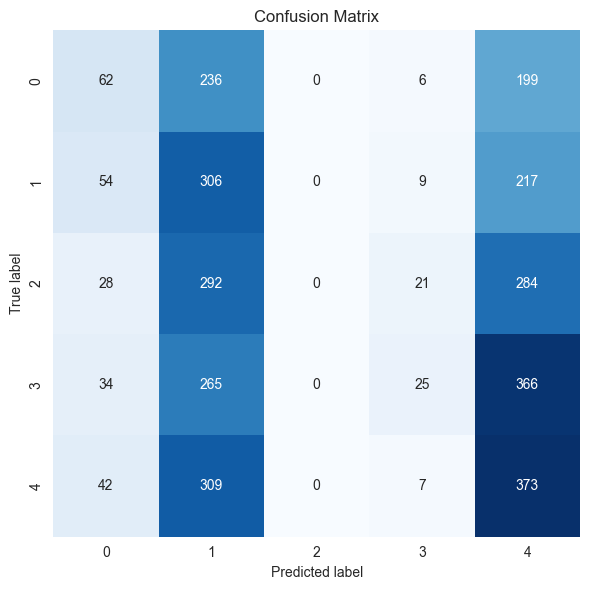

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.12      0.17       503
           1       0.22      0.52      0.31       586
           2       0.00      0.00      0.00       625
           3       0.37      0.04      0.07       690
           4       0.26      0.51      0.34       731

    accuracy                           0.24      3135
   macro avg       0.23      0.24      0.18      3135
weighted avg       0.23      0.24      0.18      3135

Epoch 2/110
--------------------------------------------------


C:\Users\USER\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Training Loss: 1.5933, Accuracy: 0.2497
Validation Loss: 1.5931, Accuracy: 0.2657
Epoch 3/110
--------------------------------------------------
Training Loss: 1.5920, Accuracy: 0.2551
Validation Loss: 1.5908, Accuracy: 0.2708
✅ Best model weights saved to model_resnet_epoch_final_3.pth.
Epoch 4/110
--------------------------------------------------
Training Loss: 1.5852, Accuracy: 0.2555
Validation Loss: 1.5769, Accuracy: 0.2542
✅ Best model weights saved to model_resnet_epoch_final_4.pth.
Epoch 5/110
--------------------------------------------------
Training Loss: 1.5792, Accuracy: 0.2632
Validation Loss: 1.6159, Accuracy: 0.2102
Epoch 6/110
--------------------------------------------------
Training Loss: 1.5743, Accuracy: 0.2736
Validation Loss: 1.6042, Accuracy: 0.2287


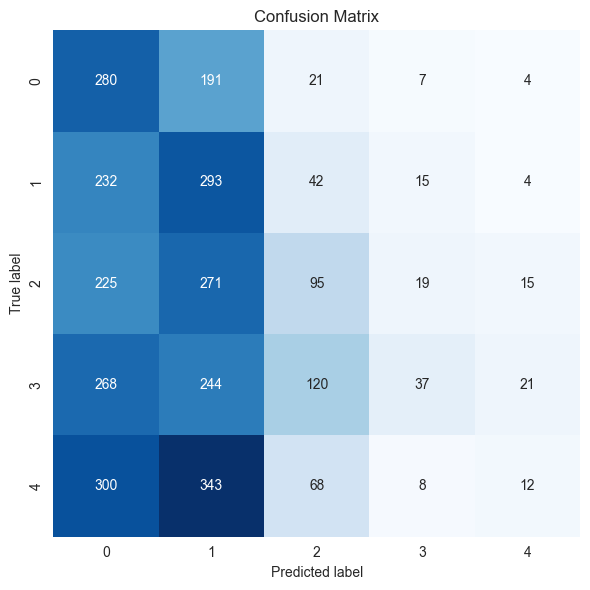

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.56      0.31       503
           1       0.22      0.50      0.30       586
           2       0.27      0.15      0.20       625
           3       0.43      0.05      0.10       690
           4       0.21      0.02      0.03       731

    accuracy                           0.23      3135
   macro avg       0.27      0.26      0.19      3135
weighted avg       0.27      0.23      0.17      3135

Epoch 7/110
--------------------------------------------------
Training Loss: 1.5698, Accuracy: 0.2694
Validation Loss: 1.5711, Accuracy: 0.2536
✅ Best model weights saved to model_resnet_epoch_final_7.pth.
Epoch 8/110
--------------------------------------------------
Training Loss: 1.5569, Accuracy: 0.2914
Validation Loss: 1.5323, Accuracy: 0.3062
✅ Best model weights saved to model_resnet_epoch_final_8.pth.
Epoch 9/110
--------------------------------------------------
Training Lo

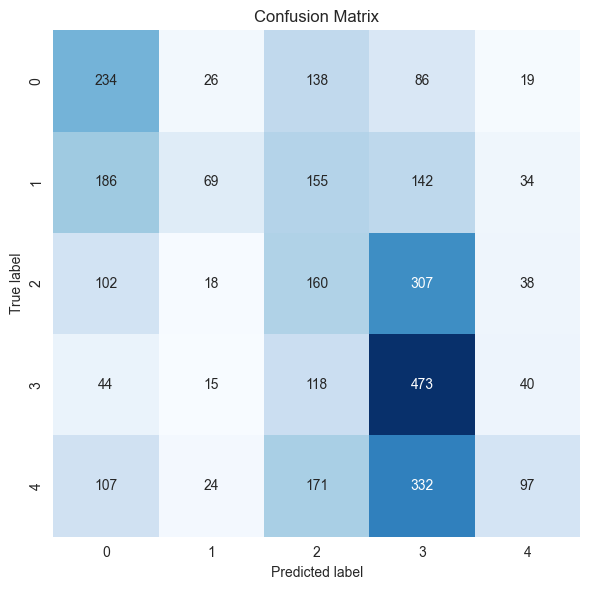

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.47      0.40       503
           1       0.45      0.12      0.19       586
           2       0.22      0.26      0.23       625
           3       0.35      0.69      0.47       690
           4       0.43      0.13      0.20       731

    accuracy                           0.33      3135
   macro avg       0.36      0.33      0.30      3135
weighted avg       0.36      0.33      0.30      3135

Epoch 12/110
--------------------------------------------------
Training Loss: 1.4811, Accuracy: 0.3408
Validation Loss: 1.6385, Accuracy: 0.2450
Epoch 13/110
--------------------------------------------------
Training Loss: 1.4499, Accuracy: 0.3637
Validation Loss: 1.4262, Accuracy: 0.3732
✅ Best model weights saved to model_resnet_epoch_final_13.pth.
Epoch 14/110
--------------------------------------------------
Training Loss: 1.4250, Accuracy: 0.3773
Validation Loss: 1.4535, Accu

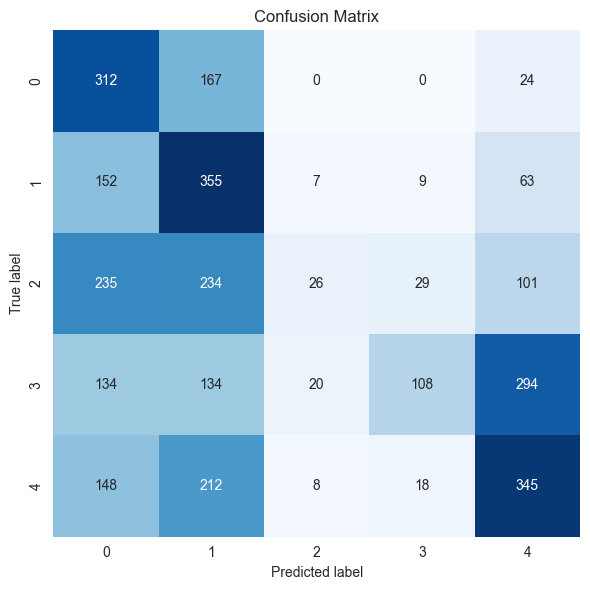

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.62      0.42       503
           1       0.32      0.61      0.42       586
           2       0.43      0.04      0.08       625
           3       0.66      0.16      0.25       690
           4       0.42      0.47      0.44       731

    accuracy                           0.37      3135
   macro avg       0.43      0.38      0.32      3135
weighted avg       0.44      0.37      0.32      3135

Epoch 17/110
--------------------------------------------------
Training Loss: 1.3396, Accuracy: 0.4269
Validation Loss: 1.3151, Accuracy: 0.4242
✅ Best model weights saved to model_resnet_epoch_final_17.pth.
Epoch 18/110
--------------------------------------------------
Training Loss: 1.3148, Accuracy: 0.4456
Validation Loss: 1.3143, Accuracy: 0.4380
✅ Best model weights saved to model_resnet_epoch_final_18.pth.
Epoch 19/110
--------------------------------------------------
Traini

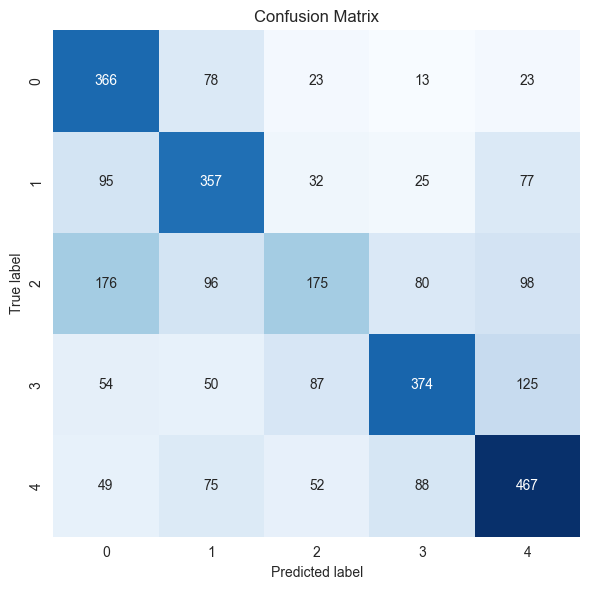

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.73      0.59       503
           1       0.54      0.61      0.57       586
           2       0.47      0.28      0.35       625
           3       0.64      0.54      0.59       690
           4       0.59      0.64      0.61       731

    accuracy                           0.55      3135
   macro avg       0.55      0.56      0.54      3135
weighted avg       0.56      0.55      0.54      3135

Epoch 22/110
--------------------------------------------------
Training Loss: 1.1653, Accuracy: 0.5209
Validation Loss: 1.1259, Accuracy: 0.5455
Epoch 23/110
--------------------------------------------------
Training Loss: 1.1321, Accuracy: 0.5335
Validation Loss: 1.0465, Accuracy: 0.5834
✅ Best model weights saved to model_resnet_epoch_final_23.pth.
Epoch 24/110
--------------------------------------------------
Training Loss: 1.1046, Accuracy: 0.5509
Validation Loss: 1.0250, Accu

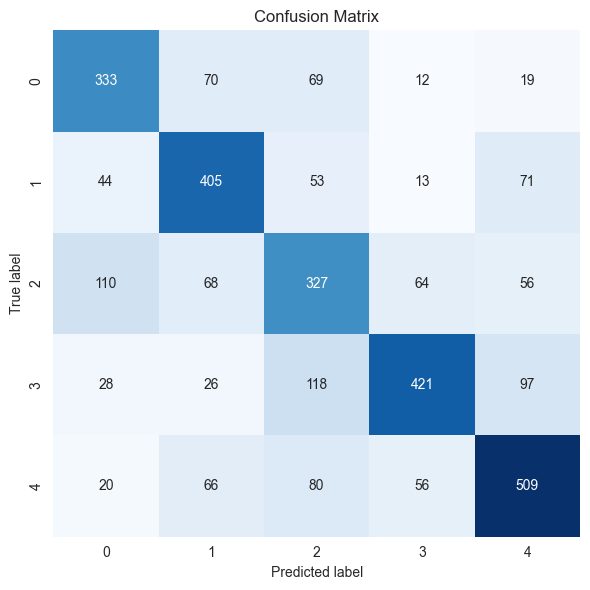

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       503
           1       0.64      0.69      0.66       586
           2       0.51      0.52      0.51       625
           3       0.74      0.61      0.67       690
           4       0.68      0.70      0.69       731

    accuracy                           0.64      3135
   macro avg       0.64      0.64      0.64      3135
weighted avg       0.64      0.64      0.64      3135

Epoch 27/110
--------------------------------------------------
Training Loss: 0.9976, Accuracy: 0.5957
Validation Loss: 0.8773, Accuracy: 0.6581
✅ Best model weights saved to model_resnet_epoch_final_27.pth.
Epoch 28/110
--------------------------------------------------
Training Loss: 0.9811, Accuracy: 0.6092
Validation Loss: 0.9811, Accuracy: 0.6121
Epoch 29/110
--------------------------------------------------
Training Loss: 0.9547, Accuracy: 0.6226
Validation Loss: 0.8215, Accu

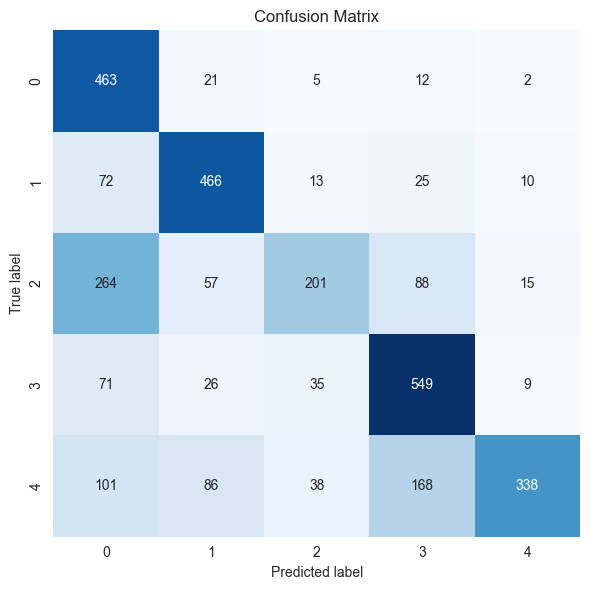

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.92      0.63       503
           1       0.71      0.80      0.75       586
           2       0.69      0.32      0.44       625
           3       0.65      0.80      0.72       690
           4       0.90      0.46      0.61       731

    accuracy                           0.64      3135
   macro avg       0.69      0.66      0.63      3135
weighted avg       0.70      0.64      0.63      3135

Epoch 32/110
--------------------------------------------------
Training Loss: 0.8633, Accuracy: 0.6589
Validation Loss: 0.7081, Accuracy: 0.7247
✅ Best model weights saved to model_resnet_epoch_final_32.pth.
Epoch 33/110
--------------------------------------------------
Training Loss: 0.8034, Accuracy: 0.6925
Validation Loss: 0.7810, Accuracy: 0.7088
Epoch 34/110
--------------------------------------------------
Training Loss: 0.8083, Accuracy: 0.6911
Validation Loss: 0.7029, Accu

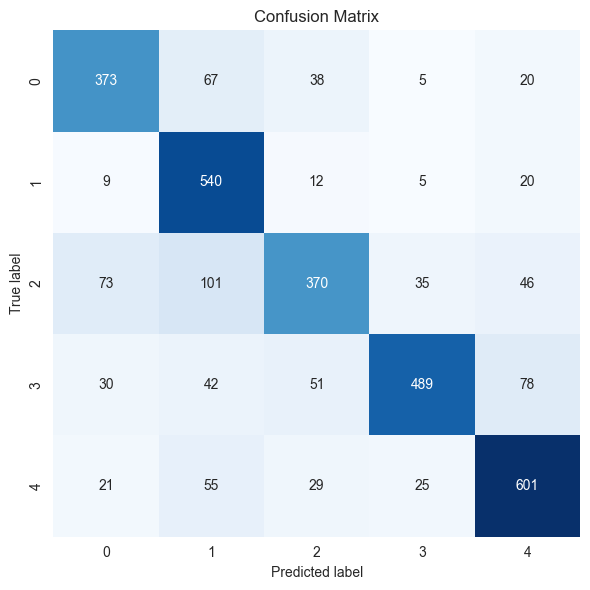

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       503
           1       0.67      0.92      0.78       586
           2       0.74      0.59      0.66       625
           3       0.87      0.71      0.78       690
           4       0.79      0.82      0.80       731

    accuracy                           0.76      3135
   macro avg       0.76      0.76      0.75      3135
weighted avg       0.77      0.76      0.75      3135

Epoch 37/110
--------------------------------------------------
Training Loss: 0.7247, Accuracy: 0.7236
Validation Loss: 0.6270, Accuracy: 0.7636
✅ Best model weights saved to model_resnet_epoch_final_37.pth.
Epoch 38/110
--------------------------------------------------
Training Loss: 0.6888, Accuracy: 0.7372
Validation Loss: 0.6188, Accuracy: 0.7652
✅ Best model weights saved to model_resnet_epoch_final_38.pth.
Epoch 39/110
--------------------------------------------------
Traini

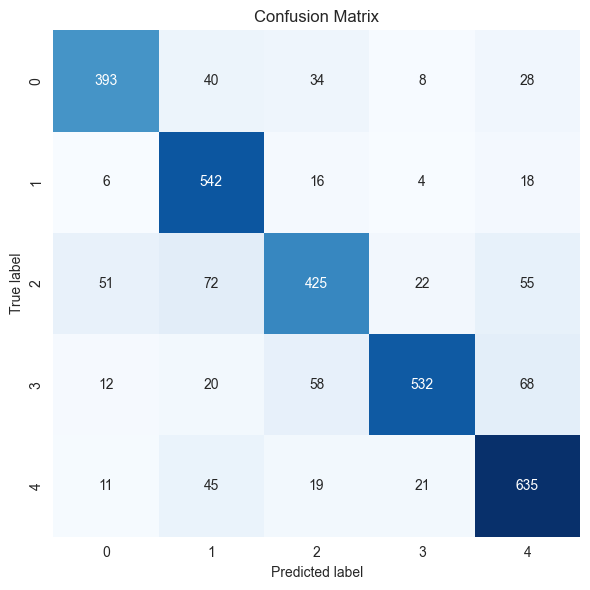

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       503
           1       0.75      0.92      0.83       586
           2       0.77      0.68      0.72       625
           3       0.91      0.77      0.83       690
           4       0.79      0.87      0.83       731

    accuracy                           0.81      3135
   macro avg       0.81      0.81      0.80      3135
weighted avg       0.81      0.81      0.80      3135

Epoch 42/110
--------------------------------------------------
Training Loss: 0.6223, Accuracy: 0.7678
Validation Loss: 0.5018, Accuracy: 0.8105
✅ Best model weights saved to model_resnet_epoch_final_42.pth.
Epoch 43/110
--------------------------------------------------
Training Loss: 0.5955, Accuracy: 0.7769
Validation Loss: 0.5239, Accuracy: 0.8067
Epoch 44/110
--------------------------------------------------
Training Loss: 0.5764, Accuracy: 0.7803
Validation Loss: 0.6562, Accu

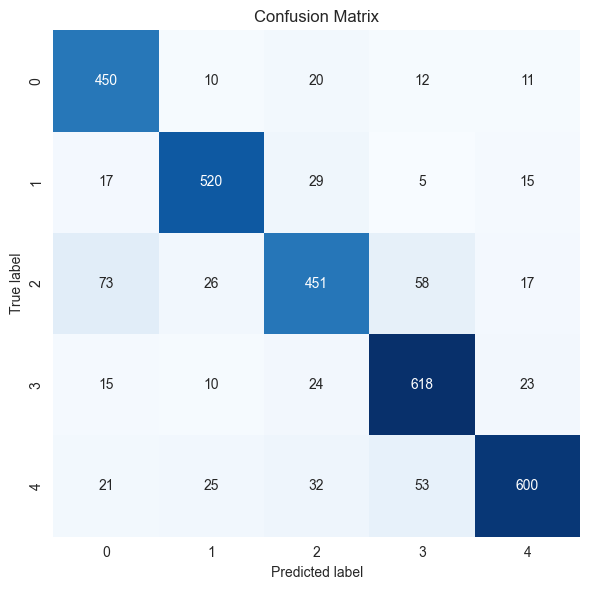

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       503
           1       0.88      0.89      0.88       586
           2       0.81      0.72      0.76       625
           3       0.83      0.90      0.86       690
           4       0.90      0.82      0.86       731

    accuracy                           0.84      3135
   macro avg       0.84      0.84      0.84      3135
weighted avg       0.84      0.84      0.84      3135

Epoch 47/110
--------------------------------------------------
Training Loss: 0.5313, Accuracy: 0.8006
Validation Loss: 0.5308, Accuracy: 0.7949
Epoch 48/110
--------------------------------------------------
Training Loss: 0.5256, Accuracy: 0.8031
Validation Loss: 0.4152, Accuracy: 0.8421
✅ Best model weights saved to model_resnet_epoch_final_48.pth.
Epoch 49/110
--------------------------------------------------
Training Loss: 0.5126, Accuracy: 0.8085
Validation Loss: 0.4537, Accu

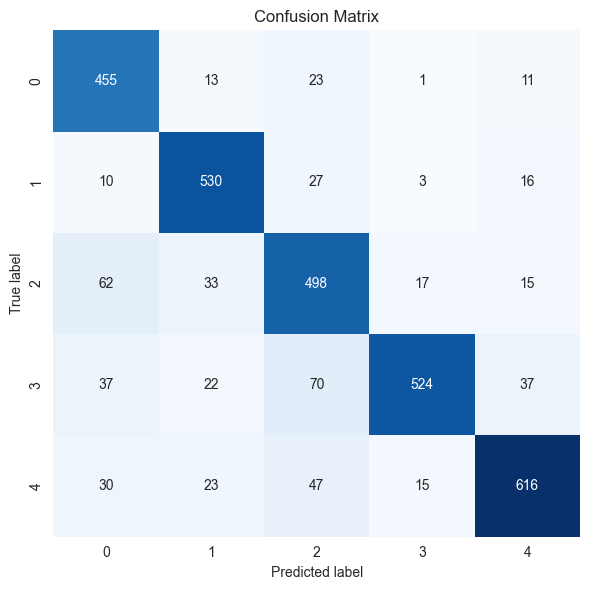

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       503
           1       0.85      0.90      0.88       586
           2       0.75      0.80      0.77       625
           3       0.94      0.76      0.84       690
           4       0.89      0.84      0.86       731

    accuracy                           0.84      3135
   macro avg       0.84      0.84      0.84      3135
weighted avg       0.84      0.84      0.84      3135

Epoch 52/110
--------------------------------------------------
Training Loss: 0.4485, Accuracy: 0.8326
Validation Loss: 0.3758, Accuracy: 0.8715
✅ Best model weights saved to model_resnet_epoch_final_52.pth.
Epoch 53/110
--------------------------------------------------
Training Loss: 0.4878, Accuracy: 0.8213
Validation Loss: 0.3904, Accuracy: 0.8632
Epoch 54/110
--------------------------------------------------
Training Loss: 0.4393, Accuracy: 0.8371
Validation Loss: 0.4073, Accu

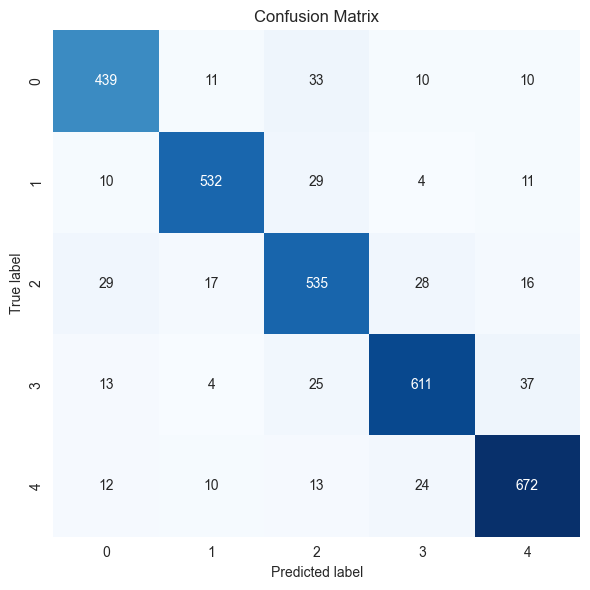

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       503
           1       0.93      0.91      0.92       586
           2       0.84      0.86      0.85       625
           3       0.90      0.89      0.89       690
           4       0.90      0.92      0.91       731

    accuracy                           0.89      3135
   macro avg       0.89      0.89      0.89      3135
weighted avg       0.89      0.89      0.89      3135

Epoch 57/110
--------------------------------------------------
Training Loss: 0.4079, Accuracy: 0.8484
Validation Loss: 0.3598, Accuracy: 0.8769
Epoch 58/110
--------------------------------------------------
Training Loss: 0.3974, Accuracy: 0.8550
Validation Loss: 0.3081, Accuracy: 0.9021
✅ Best model weights saved to model_resnet_epoch_final_58.pth.
Epoch 59/110
--------------------------------------------------
Training Loss: 0.3880, Accuracy: 0.8575
Validation Loss: 0.3733, Accu

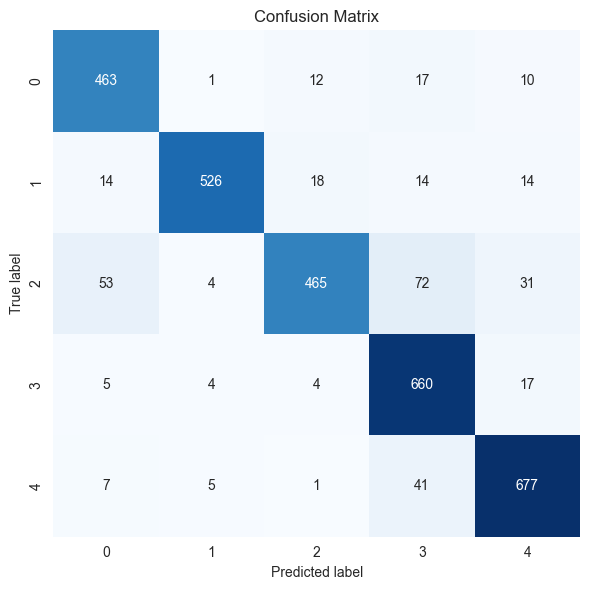

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       503
           1       0.97      0.90      0.93       586
           2       0.93      0.74      0.83       625
           3       0.82      0.96      0.88       690
           4       0.90      0.93      0.91       731

    accuracy                           0.89      3135
   macro avg       0.90      0.89      0.89      3135
weighted avg       0.90      0.89      0.89      3135

Epoch 62/110
--------------------------------------------------
Training Loss: 0.3692, Accuracy: 0.8655
Validation Loss: 0.2841, Accuracy: 0.9040
✅ Best model weights saved to model_resnet_epoch_final_62.pth.
Epoch 63/110
--------------------------------------------------
Training Loss: 0.3542, Accuracy: 0.8667
Validation Loss: 0.2811, Accuracy: 0.9043
✅ Best model weights saved to model_resnet_epoch_final_63.pth.
Epoch 64/110
--------------------------------------------------
Traini

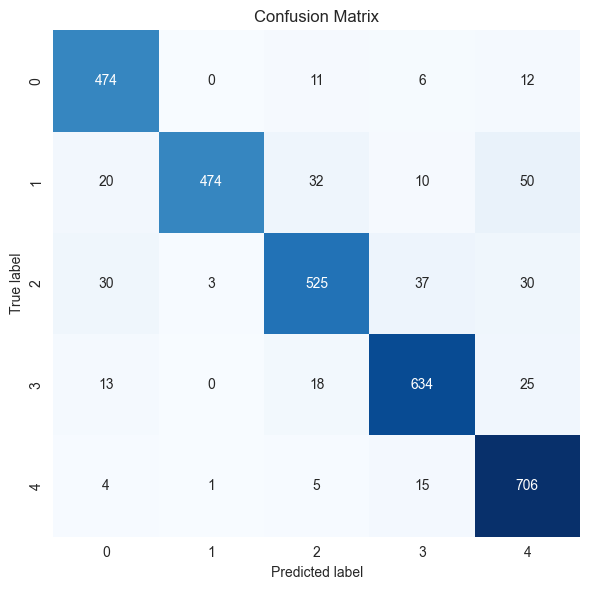

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       503
           1       0.99      0.81      0.89       586
           2       0.89      0.84      0.86       625
           3       0.90      0.92      0.91       690
           4       0.86      0.97      0.91       731

    accuracy                           0.90      3135
   macro avg       0.90      0.90      0.90      3135
weighted avg       0.90      0.90      0.90      3135

Epoch 67/110
--------------------------------------------------
Training Loss: 0.3368, Accuracy: 0.8791
Validation Loss: 0.3167, Accuracy: 0.8938
Epoch 68/110
--------------------------------------------------
Training Loss: 0.3260, Accuracy: 0.8830
Validation Loss: 0.2882, Accuracy: 0.9037
Epoch 69/110
--------------------------------------------------
Training Loss: 0.3228, Accuracy: 0.8843
Validation Loss: 0.2813, Accuracy: 0.9091
Epoch 70/110
-------------------------------------

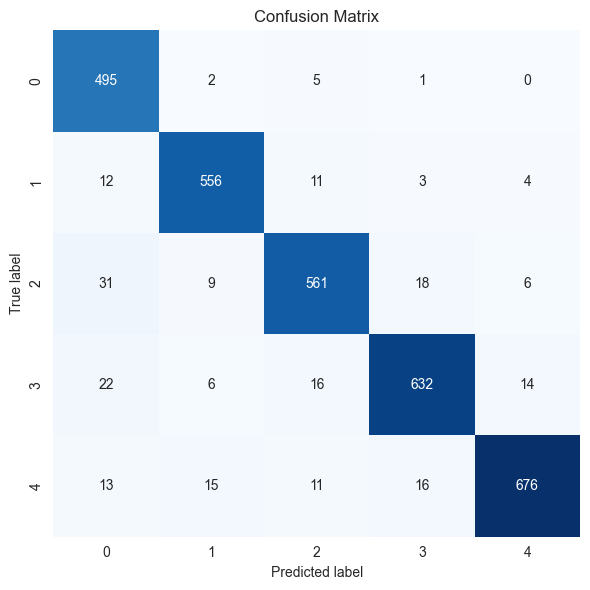

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       503
           1       0.95      0.95      0.95       586
           2       0.93      0.90      0.91       625
           3       0.94      0.92      0.93       690
           4       0.97      0.92      0.94       731

    accuracy                           0.93      3135
   macro avg       0.93      0.93      0.93      3135
weighted avg       0.93      0.93      0.93      3135

Epoch 72/110
--------------------------------------------------
Training Loss: 0.2370, Accuracy: 0.9144
Validation Loss: 0.2350, Accuracy: 0.9215
Epoch 73/110
--------------------------------------------------
Training Loss: 0.2290, Accuracy: 0.9162
Validation Loss: 0.2580, Accuracy: 0.9123
Epoch 74/110
--------------------------------------------------
Training Loss: 0.2357, Accuracy: 0.9141
Validation Loss: 0.2011, Accuracy: 0.9362
✅ Best model weights saved to model_resnet_epoch_f

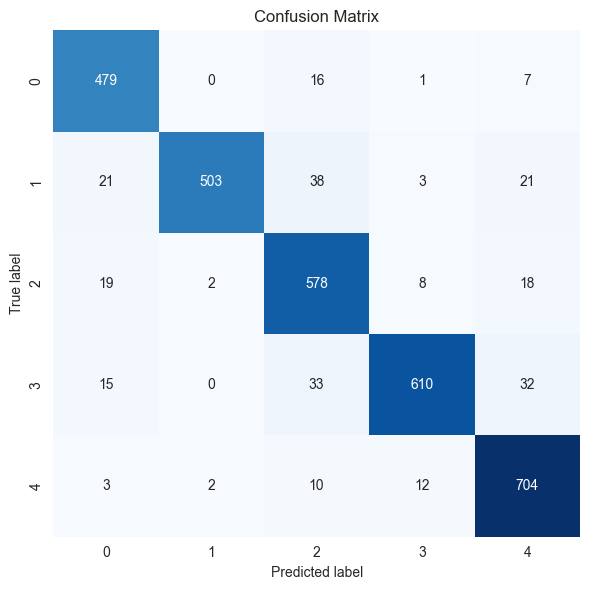

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       503
           1       0.99      0.86      0.92       586
           2       0.86      0.92      0.89       625
           3       0.96      0.88      0.92       690
           4       0.90      0.96      0.93       731

    accuracy                           0.92      3135
   macro avg       0.92      0.92      0.92      3135
weighted avg       0.92      0.92      0.92      3135

Epoch 77/110
--------------------------------------------------
Training Loss: 0.2123, Accuracy: 0.9251
Validation Loss: 0.2099, Accuracy: 0.9413
Epoch 78/110
--------------------------------------------------
Training Loss: 0.2133, Accuracy: 0.9268
Validation Loss: 0.2350, Accuracy: 0.9292
Epoch 79/110
--------------------------------------------------
Training Loss: 0.1814, Accuracy: 0.9368
Validation Loss: 0.1988, Accuracy: 0.9448
✅ Best model weights saved to model_resnet_epoch_f

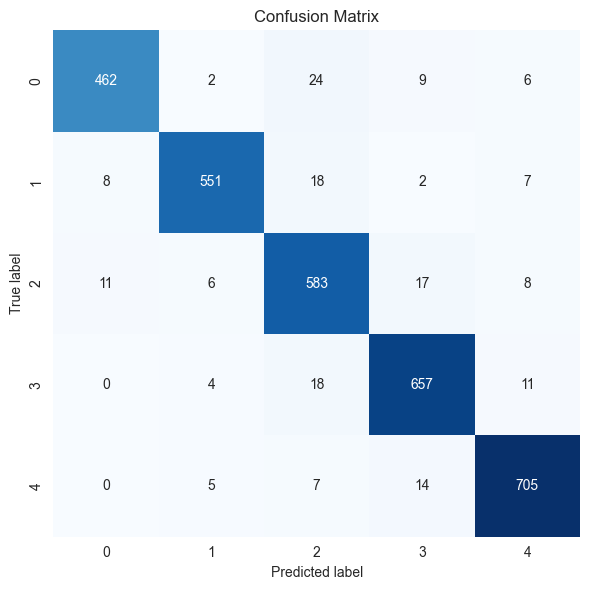

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       503
           1       0.97      0.94      0.95       586
           2       0.90      0.93      0.91       625
           3       0.94      0.95      0.95       690
           4       0.96      0.96      0.96       731

    accuracy                           0.94      3135
   macro avg       0.94      0.94      0.94      3135
weighted avg       0.94      0.94      0.94      3135

Epoch 82/110
--------------------------------------------------
Training Loss: 0.1751, Accuracy: 0.9410
Validation Loss: 0.1887, Accuracy: 0.9509
Epoch 83/110
--------------------------------------------------
Training Loss: 0.1704, Accuracy: 0.9392
Validation Loss: 0.1896, Accuracy: 0.9480
Epoch 84/110
--------------------------------------------------
Training Loss: 0.1690, Accuracy: 0.9379
Validation Loss: 0.2242, Accuracy: 0.9321
Epoch 85/110
-------------------------------------

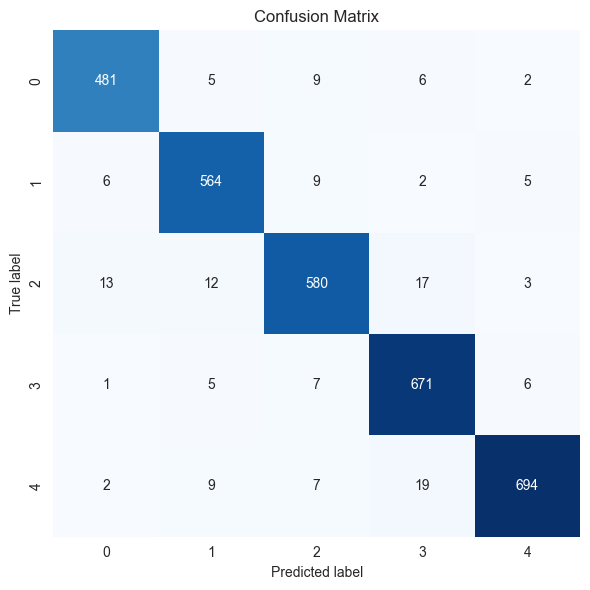

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       503
           1       0.95      0.96      0.96       586
           2       0.95      0.93      0.94       625
           3       0.94      0.97      0.96       690
           4       0.98      0.95      0.96       731

    accuracy                           0.95      3135
   macro avg       0.95      0.95      0.95      3135
weighted avg       0.95      0.95      0.95      3135

Epoch 87/110
--------------------------------------------------
Training Loss: 0.1497, Accuracy: 0.9471
Validation Loss: 0.1697, Accuracy: 0.9518
✅ Best model weights saved to model_resnet_epoch_final_87.pth.
Epoch 88/110
--------------------------------------------------
Training Loss: 0.1391, Accuracy: 0.9512
Validation Loss: 0.1851, Accuracy: 0.9499
Epoch 89/110
--------------------------------------------------
Training Loss: 0.1467, Accuracy: 0.9506
Validation Loss: 0.1754, Accu

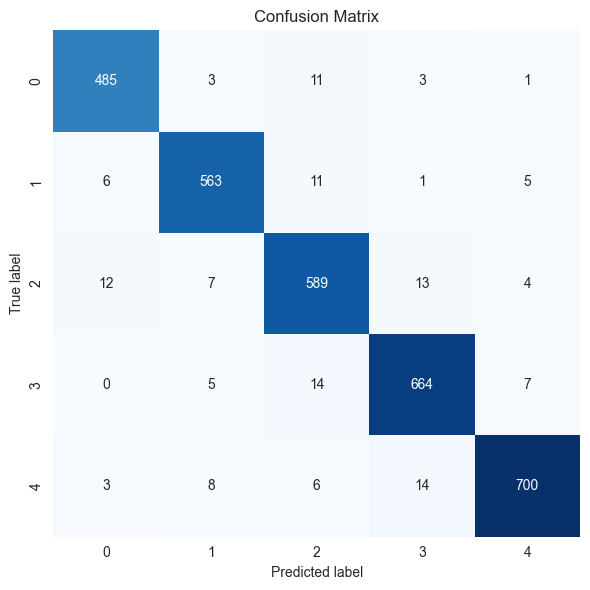

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       503
           1       0.96      0.96      0.96       586
           2       0.93      0.94      0.94       625
           3       0.96      0.96      0.96       690
           4       0.98      0.96      0.97       731

    accuracy                           0.96      3135
   macro avg       0.96      0.96      0.96      3135
weighted avg       0.96      0.96      0.96      3135

Epoch 92/110
--------------------------------------------------
Training Loss: 0.1441, Accuracy: 0.9490
Validation Loss: 0.1640, Accuracy: 0.9573
Epoch 93/110
--------------------------------------------------
Training Loss: 0.1446, Accuracy: 0.9492
Validation Loss: 0.1718, Accuracy: 0.9525
Epoch 94/110
--------------------------------------------------
Training Loss: 0.1428, Accuracy: 0.9504
Validation Loss: 0.1659, Accuracy: 0.9576
Epoch 95/110
-------------------------------------

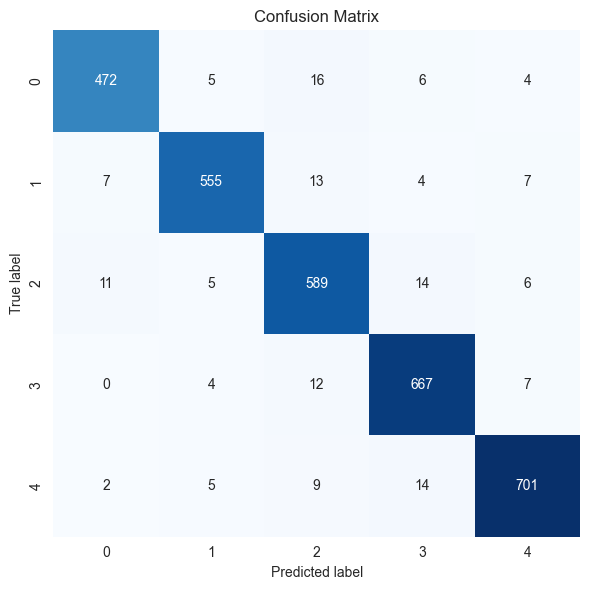

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       503
           1       0.97      0.95      0.96       586
           2       0.92      0.94      0.93       625
           3       0.95      0.97      0.96       690
           4       0.97      0.96      0.96       731

    accuracy                           0.95      3135
   macro avg       0.95      0.95      0.95      3135
weighted avg       0.95      0.95      0.95      3135

Epoch 97/110
--------------------------------------------------
Training Loss: 0.1348, Accuracy: 0.9495
Validation Loss: 0.1632, Accuracy: 0.9589
✅ Best model weights saved to model_resnet_epoch_final_97.pth.
Epoch 98/110
--------------------------------------------------
Training Loss: 0.1245, Accuracy: 0.9563
Validation Loss: 0.1628, Accuracy: 0.9560
✅ Best model weights saved to model_resnet_epoch_final_98.pth.
Epoch 99/110
--------------------------------------------------
Traini

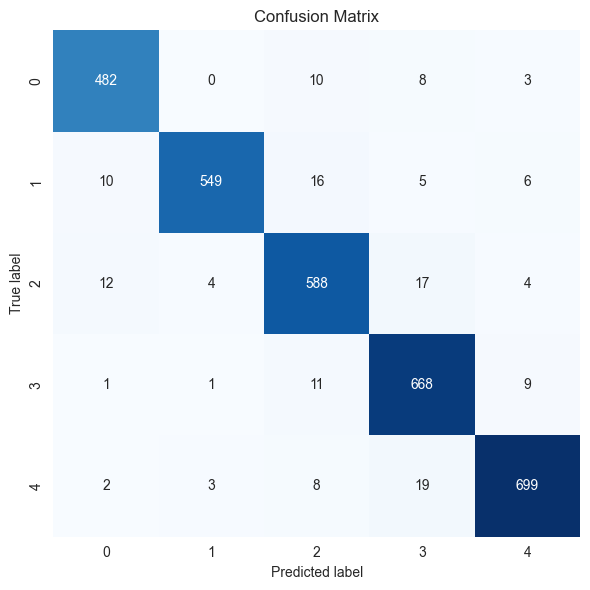

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       503
           1       0.99      0.94      0.96       586
           2       0.93      0.94      0.93       625
           3       0.93      0.97      0.95       690
           4       0.97      0.96      0.96       731

    accuracy                           0.95      3135
   macro avg       0.95      0.95      0.95      3135
weighted avg       0.95      0.95      0.95      3135

Epoch 102/110
--------------------------------------------------
Training Loss: 0.1305, Accuracy: 0.9536
Validation Loss: 0.1661, Accuracy: 0.9563
Epoch 103/110
--------------------------------------------------
Training Loss: 0.1190, Accuracy: 0.9594
Validation Loss: 0.1622, Accuracy: 0.9576
✅ Best model weights saved to model_resnet_epoch_final_103.pth.
Epoch 104/110
--------------------------------------------------
Training Loss: 0.1297, Accuracy: 0.9549
Validation Loss: 0.1703, 

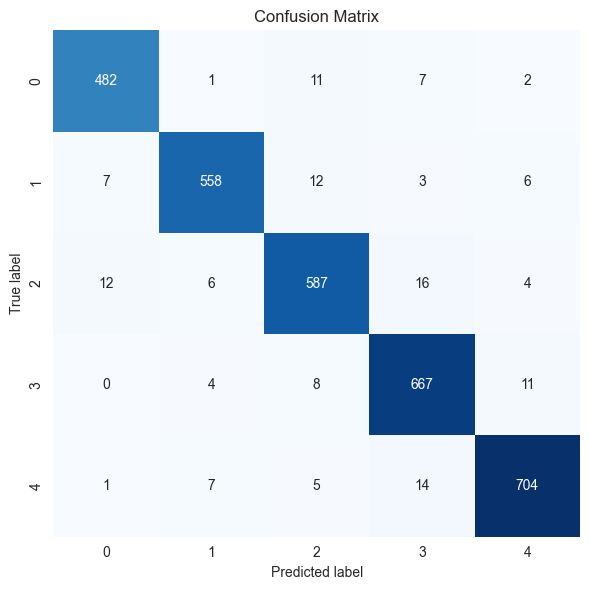

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       503
           1       0.97      0.95      0.96       586
           2       0.94      0.94      0.94       625
           3       0.94      0.97      0.95       690
           4       0.97      0.96      0.97       731

    accuracy                           0.96      3135
   macro avg       0.96      0.96      0.96      3135
weighted avg       0.96      0.96      0.96      3135

Epoch 107/110
--------------------------------------------------
Training Loss: 0.1186, Accuracy: 0.9595
Validation Loss: 0.1634, Accuracy: 0.9579
Epoch 108/110
--------------------------------------------------
Training Loss: 0.1162, Accuracy: 0.9586
Validation Loss: 0.1634, Accuracy: 0.9573
Epoch 109/110
--------------------------------------------------
Training Loss: 0.1195, Accuracy: 0.9552
Validation Loss: 0.1621, Accuracy: 0.9573
✅ Best model weights saved to model_resnet_epoc

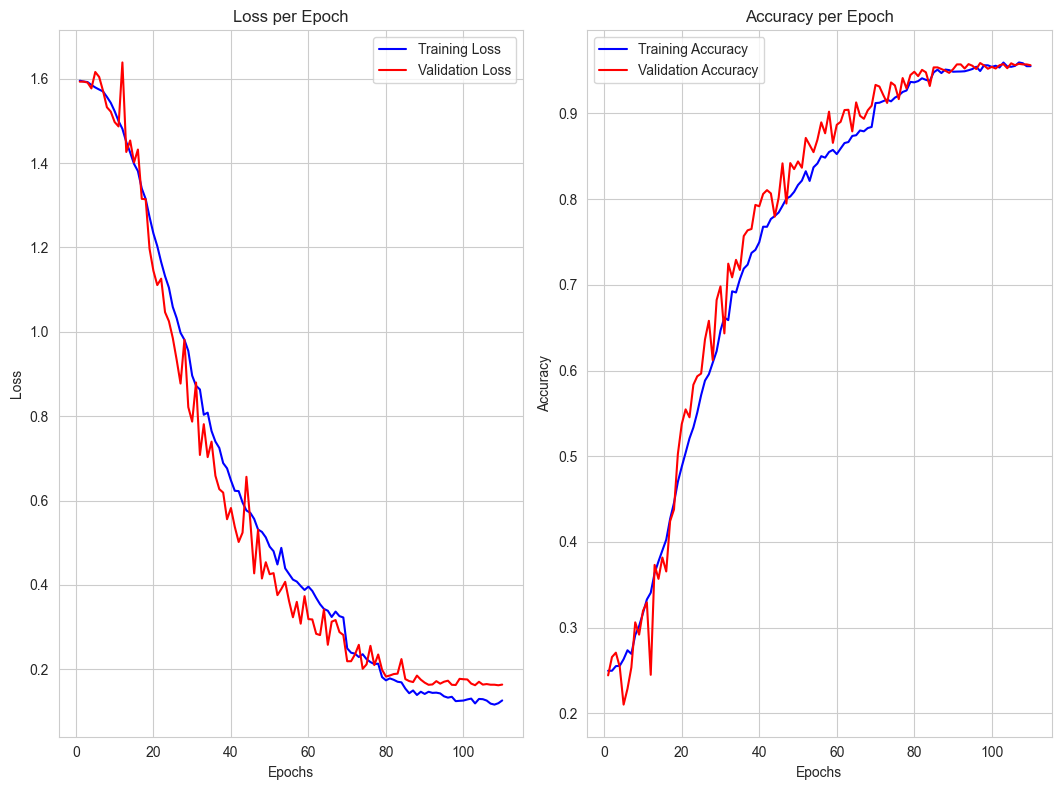

In [34]:
# Example:
early_stopping = EarlyStopping(patience=15, verbose=True, delta=0)
model_name_prefix = "Resnet18"  # Or dynamically change this per model
trained_model = train_and_validate(
    model_resnet,
    train_loader,
    val_loader,
    optimizer,
    scheduler,
    loss_fn,
    epochs=110,
    device=device,
    early_stopping=early_stopping,
    model_name_prefix=model_name_prefix)

Test Loss: 1.6294, Test Accuracy: 0.2073
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       251
           1       0.21      0.82      0.33       293
           2       0.21      0.23      0.22       313
           3       0.00      0.00      0.00       345
           4       0.18      0.04      0.07       366

    accuracy                           0.21      1568
   macro avg       0.12      0.22      0.12      1568
weighted avg       0.12      0.21      0.12      1568



C:\Users\USER\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

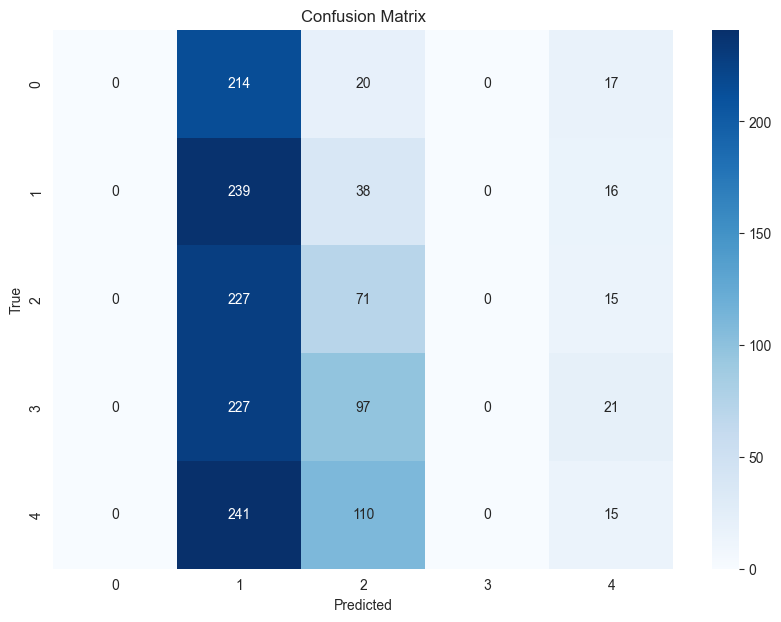

In [36]:
test_model(trained_model, test_loader, loss_fn, device, num_classes=5)

In [37]:
import os
import torch
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms

#  config
MODEL_PATH = 'model_resnet_epoch_final_109.pth'
TEST_FOLDER = 'largeFaceShape_dataset/test'
SAVE_PATH = 'predictions_resnet.txt'
CSV_PATH = 'train_data.csv'
IMAGE_SIZE = 224
NUM_CLASSES = 5

df = pd.read_csv(CSV_PATH)
label_to_idx = {label: idx for idx, label in enumerate(sorted(df['label'].unique()))}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

model_resnet = ResNet18_Faceshape(num_classes=NUM_CLASSES)
model_resnet.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model_resnet.to(device)
model_resnet.eval()

def predict_all_images(model_resnet, folder_path, save_path):
    results = []
    valid_format = (".jpg", ".jpeg", ".png", ".jfif", ".bmp", ".webp")
    image_count = 0

    for root, _, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(valid_format):
                image_path = os.path.join(root, filename)
                try:
                    img = Image.open(image_path).convert("RGB")
                    img_tensor = transform(img).unsqueeze(0).to(device)
                except Exception as e:
                    print(f"skipped {filename} (error: {e})")
                    continue

                with torch.no_grad():
                    output = model_resnet(img_tensor)
                    pred_idx = torch.argmax(output, dim=1).item()
                    pred_label = idx_to_label[pred_idx]

                results.append(f"{filename} --> Predicted: {pred_label}\n")
                image_count += 1

    with open(save_path, 'w') as f:
        f.writelines(results)

    print(f"\n✅ Done! {image_count} images processed.")
    print(f"📄 Predictions saved to: {save_path}")

predict_all_images(model_resnet, TEST_FOLDER, SAVE_PATH)


C:\Users\USER\PyCharmMiscProject\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\USER\PyCharmMiscProject\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



✅ Done! 1313 images processed.
📄 Predictions saved to: predictions_resnet.txt


In [42]:
def predict_single_image(model_resnet, image_path):
    valid_exts = (".jpg", ".jpeg", ".png", ".jfif", ".bmp", ".webp")

    if not image_path.lower().endswith(valid_exts):
        print("❌ invalid image file format.")
        return

    try:
        img = Image.open(image_path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0).to(device)
    except Exception as e:
        print(f"❌ error loading image: {e}")
        return

    model_resnet.eval()
    with torch.no_grad():
        output = model_resnet(img_tensor)
        pred_idx = torch.argmax(output, dim=1).item()
        pred_label = idx_to_label[pred_idx]

    print(f"✅ predicted face shape: {pred_label}")

img_path = 'round1.jpg'
predict_single_image(model_resnet, img_path)

✅ predicted face shape: oval


In [39]:
from torchvision import models

model_resnet.load_state_dict(torch.load("model_resnet_epoch_final_109.pth", map_location=device))
model_resnet.to(device)
model_resnet.eval()

def evaluate_from_csv(model, csv_path):
    df = pd.read_csv(csv_path)
    correct = 0
    total = 0

    for _, row in df.iterrows():
        image_path = row['filepath']
        true_label = row['label']

        try:
            img = Image.open(image_path).convert("RGB")
            img_tensor = transform(img).unsqueeze(0).to(device)
        except Exception as e:
            print(f"❌ Skipped {image_path} (error: {e})")
            continue

        with torch.no_grad():
            output = model(img_tensor)
            pred_idx = torch.argmax(output, dim=1).item()
            pred_label = idx_to_label[pred_idx]

        if pred_label == true_label:
            correct += 1
        total += 1

    acc = correct / total if total > 0 else 0
    print(f"\n🎯 Prediction Accuracy from CSV = {acc * 100:.2f}%")


evaluate_from_csv(model_resnet, 'test_data.csv')


🎯 Prediction Accuracy from CSV = 20.73%


C:\Users\USER\AppData\Local\Temp\ipykernel_20300\1025881885.py:315: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


✅ Model Initialized on cuda
Epoch 1/110
--------------------------------------------------
Training Loss: 1.6407, Accuracy: 0.2743
Validation Loss: 1.4528, Accuracy: 0.3802
✅ Best model weights saved to model_epoch_final_cw_1.pkt.


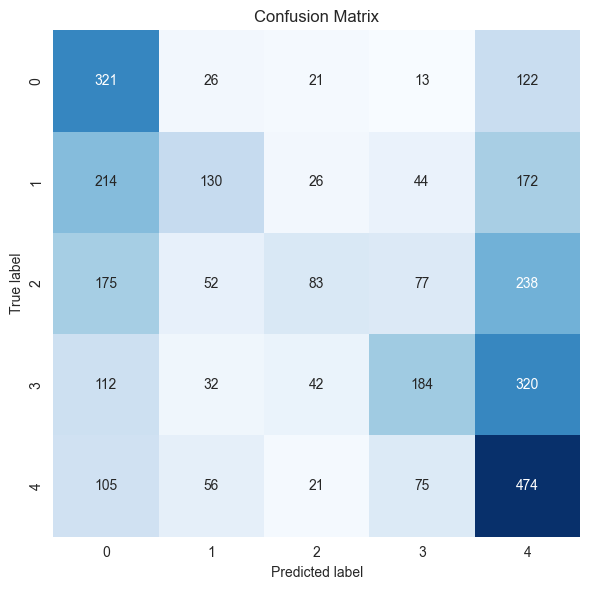

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.64      0.45       503
           1       0.44      0.22      0.29       586
           2       0.43      0.13      0.20       625
           3       0.47      0.27      0.34       690
           4       0.36      0.65      0.46       731

    accuracy                           0.38      3135
   macro avg       0.41      0.38      0.35      3135
weighted avg       0.41      0.38      0.35      3135

Epoch 2/110
--------------------------------------------------
Training Loss: 1.4800, Accuracy: 0.3538
Validation Loss: 1.3522, Accuracy: 0.4450
✅ Best model weights saved to model_epoch_final_cw_2.pkt.
Epoch 3/110
--------------------------------------------------
Training Loss: 1.4037, Accuracy: 0.4010
Validation Loss: 1.4412, Accuracy: 0.3601
Epoch 4/110
--------------------------------------------------
Training Loss: 1.3482, Accuracy: 0.4267
Validation Loss: 1.2104, Accuracy: 0.

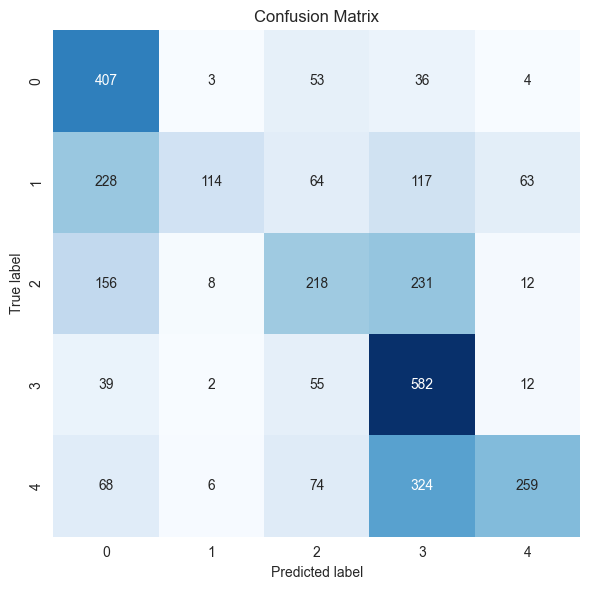

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.81      0.58       503
           1       0.86      0.19      0.32       586
           2       0.47      0.35      0.40       625
           3       0.45      0.84      0.59       690
           4       0.74      0.35      0.48       731

    accuracy                           0.50      3135
   macro avg       0.59      0.51      0.47      3135
weighted avg       0.60      0.50      0.47      3135

Epoch 7/110
--------------------------------------------------
Training Loss: 1.2116, Accuracy: 0.5101
Validation Loss: 1.0512, Accuracy: 0.5649
✅ Best model weights saved to model_epoch_final_cw_7.pkt.
Epoch 8/110
--------------------------------------------------
Training Loss: 1.1603, Accuracy: 0.5274
Validation Loss: 1.1958, Accuracy: 0.5356
Epoch 9/110
--------------------------------------------------
Training Loss: 1.1315, Accuracy: 0.5426
Validation Loss: 0.9444, Accuracy: 0.

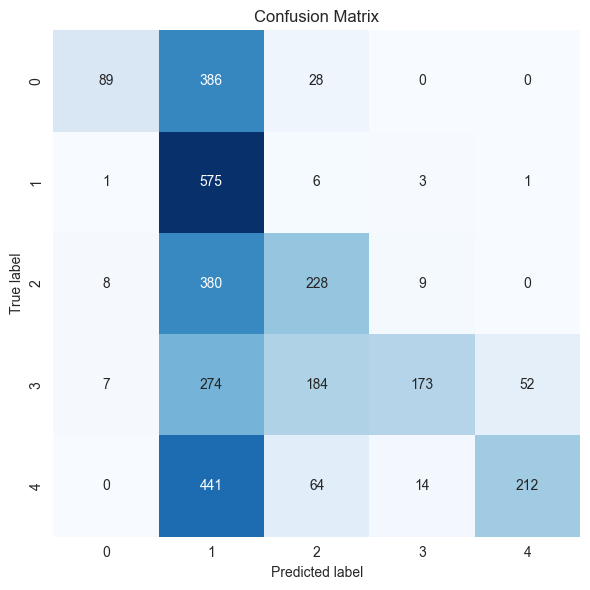

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.18      0.29       503
           1       0.28      0.98      0.44       586
           2       0.45      0.36      0.40       625
           3       0.87      0.25      0.39       690
           4       0.80      0.29      0.43       731

    accuracy                           0.41      3135
   macro avg       0.65      0.41      0.39      3135
weighted avg       0.66      0.41      0.39      3135

Epoch 12/110
--------------------------------------------------
Training Loss: 1.0388, Accuracy: 0.5901
Validation Loss: 0.9531, Accuracy: 0.6166
Epoch 13/110
--------------------------------------------------
Training Loss: 1.0126, Accuracy: 0.6022
Validation Loss: 0.8618, Accuracy: 0.6443
✅ Best model weights saved to model_epoch_final_cw_13.pkt.
Epoch 14/110
--------------------------------------------------
Training Loss: 0.9875, Accuracy: 0.6107
Validation Loss: 0.8065, Accuracy

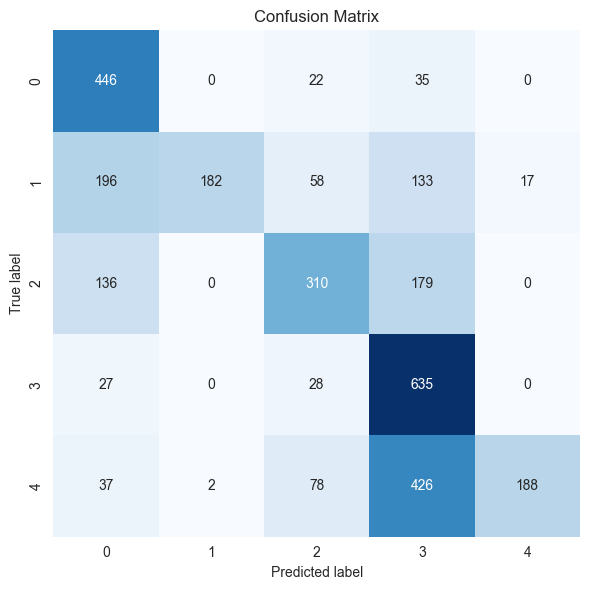

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.89      0.66       503
           1       0.99      0.31      0.47       586
           2       0.62      0.50      0.55       625
           3       0.45      0.92      0.61       690
           4       0.92      0.26      0.40       731

    accuracy                           0.56      3135
   macro avg       0.70      0.57      0.54      3135
weighted avg       0.71      0.56      0.53      3135

Epoch 17/110
--------------------------------------------------
Training Loss: 0.9210, Accuracy: 0.6463
Validation Loss: 0.7401, Accuracy: 0.7333
✅ Best model weights saved to model_epoch_final_cw_17.pkt.
Epoch 18/110
--------------------------------------------------
Training Loss: 0.8970, Accuracy: 0.6538
Validation Loss: 1.1368, Accuracy: 0.5620
Epoch 19/110
--------------------------------------------------
Training Loss: 0.8718, Accuracy: 0.6592
Validation Loss: 0.9037, Accuracy

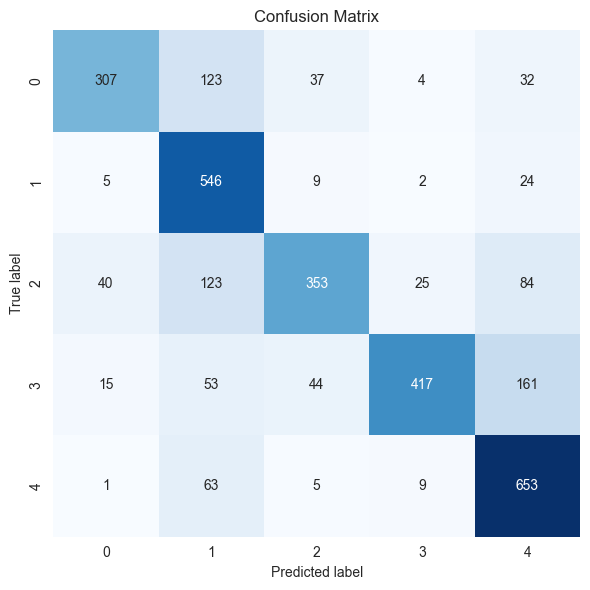

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.61      0.70       503
           1       0.60      0.93      0.73       586
           2       0.79      0.56      0.66       625
           3       0.91      0.60      0.73       690
           4       0.68      0.89      0.78       731

    accuracy                           0.73      3135
   macro avg       0.76      0.72      0.72      3135
weighted avg       0.76      0.73      0.72      3135

Epoch 22/110
--------------------------------------------------
Training Loss: 0.7896, Accuracy: 0.6973
Validation Loss: 0.5003, Accuracy: 0.8175
✅ Best model weights saved to model_epoch_final_cw_22.pkt.
Epoch 23/110
--------------------------------------------------
Training Loss: 0.7383, Accuracy: 0.7236
Validation Loss: 0.5710, Accuracy: 0.7812
Epoch 24/110
--------------------------------------------------
Training Loss: 0.7429, Accuracy: 0.7226
Validation Loss: 0.5339, Accuracy

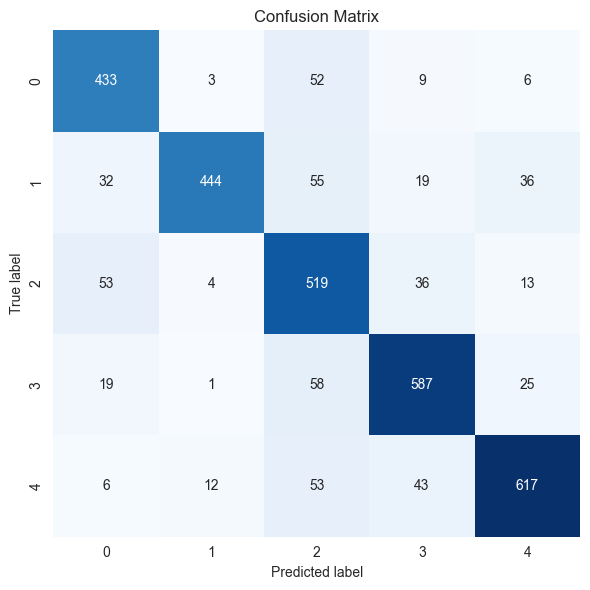

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       503
           1       0.96      0.76      0.85       586
           2       0.70      0.83      0.76       625
           3       0.85      0.85      0.85       690
           4       0.89      0.84      0.86       731

    accuracy                           0.83      3135
   macro avg       0.84      0.83      0.83      3135
weighted avg       0.84      0.83      0.83      3135

Epoch 27/110
--------------------------------------------------
Training Loss: 0.7095, Accuracy: 0.7351
Validation Loss: 0.6026, Accuracy: 0.7722
Epoch 28/110
--------------------------------------------------
Training Loss: 0.7016, Accuracy: 0.7351
Validation Loss: 0.4998, Accuracy: 0.8163
Epoch 29/110
--------------------------------------------------
Training Loss: 0.6756, Accuracy: 0.7471
Validation Loss: 0.5613, Accuracy: 0.7831
Epoch 30/110
-------------------------------------

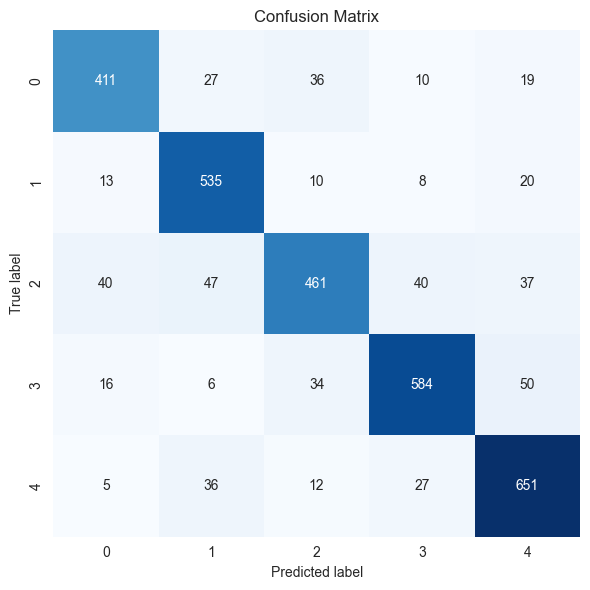

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       503
           1       0.82      0.91      0.86       586
           2       0.83      0.74      0.78       625
           3       0.87      0.85      0.86       690
           4       0.84      0.89      0.86       731

    accuracy                           0.84      3135
   macro avg       0.84      0.84      0.84      3135
weighted avg       0.84      0.84      0.84      3135

Epoch 32/110
--------------------------------------------------
Training Loss: 0.6562, Accuracy: 0.7574
Validation Loss: 0.4627, Accuracy: 0.8300
Epoch 33/110
--------------------------------------------------
Training Loss: 0.6542, Accuracy: 0.7575
Validation Loss: 0.4680, Accuracy: 0.8278
Epoch 34/110
--------------------------------------------------
Training Loss: 0.6348, Accuracy: 0.7660
Validation Loss: 0.4086, Accuracy: 0.8625
✅ Best model weights saved to model_epoch_final_cw

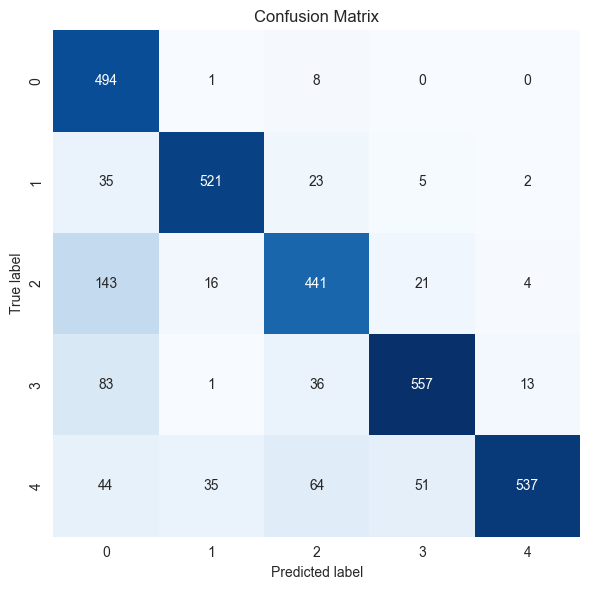

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.98      0.76       503
           1       0.91      0.89      0.90       586
           2       0.77      0.71      0.74       625
           3       0.88      0.81      0.84       690
           4       0.97      0.73      0.83       731

    accuracy                           0.81      3135
   macro avg       0.83      0.82      0.81      3135
weighted avg       0.84      0.81      0.82      3135

Epoch 37/110
--------------------------------------------------
Training Loss: 0.6048, Accuracy: 0.7786
Validation Loss: 0.4127, Accuracy: 0.8485
Epoch 38/110
--------------------------------------------------
Training Loss: 0.6091, Accuracy: 0.7769
Validation Loss: 0.5900, Accuracy: 0.7716
Epoch 39/110
--------------------------------------------------
Training Loss: 0.5864, Accuracy: 0.7871
Validation Loss: 0.4489, Accuracy: 0.8520
Epoch 40/110
-------------------------------------

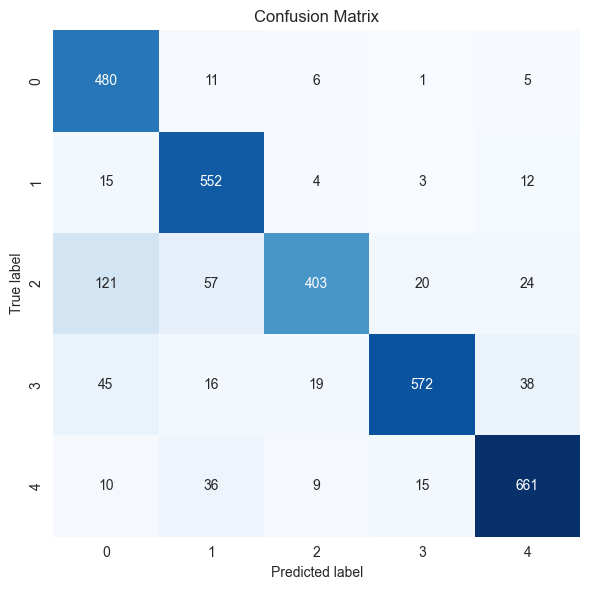

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       503
           1       0.82      0.94      0.88       586
           2       0.91      0.64      0.76       625
           3       0.94      0.83      0.88       690
           4       0.89      0.90      0.90       731

    accuracy                           0.85      3135
   macro avg       0.86      0.85      0.85      3135
weighted avg       0.86      0.85      0.85      3135

Epoch 42/110
--------------------------------------------------
Training Loss: 0.5723, Accuracy: 0.7938
Validation Loss: 0.3625, Accuracy: 0.8759
✅ Best model weights saved to model_epoch_final_cw_42.pkt.
Epoch 43/110
--------------------------------------------------
Training Loss: 0.5522, Accuracy: 0.7999
Validation Loss: 0.3974, Accuracy: 0.8501
Epoch 44/110
--------------------------------------------------
Training Loss: 0.5496, Accuracy: 0.8030
Validation Loss: 0.4032, Accuracy

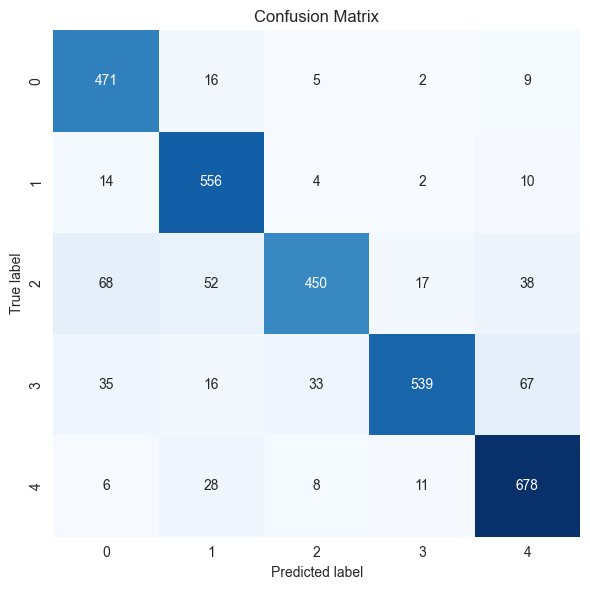

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       503
           1       0.83      0.95      0.89       586
           2       0.90      0.72      0.80       625
           3       0.94      0.78      0.85       690
           4       0.85      0.93      0.88       731

    accuracy                           0.86      3135
   macro avg       0.86      0.86      0.86      3135
weighted avg       0.87      0.86      0.86      3135

Epoch 47/110
--------------------------------------------------
Training Loss: 0.5391, Accuracy: 0.8058
Validation Loss: 0.3206, Accuracy: 0.8960
✅ Best model weights saved to model_epoch_final_cw_47.pkt.
Epoch 48/110
--------------------------------------------------
Training Loss: 0.5308, Accuracy: 0.8103
Validation Loss: 0.3207, Accuracy: 0.8915
Epoch 49/110
--------------------------------------------------
Training Loss: 0.5238, Accuracy: 0.8085
Validation Loss: 0.3352, Accuracy

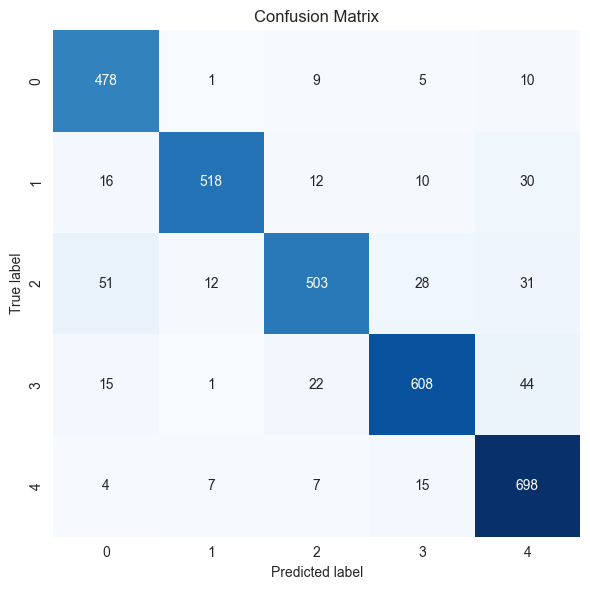

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       503
           1       0.96      0.88      0.92       586
           2       0.91      0.80      0.85       625
           3       0.91      0.88      0.90       690
           4       0.86      0.95      0.90       731

    accuracy                           0.89      3135
   macro avg       0.90      0.90      0.89      3135
weighted avg       0.90      0.89      0.89      3135

Epoch 52/110
--------------------------------------------------
Training Loss: 0.5276, Accuracy: 0.8118
Validation Loss: 0.3586, Accuracy: 0.8727
Epoch 53/110
--------------------------------------------------
Training Loss: 0.5282, Accuracy: 0.8102
Validation Loss: 0.3837, Accuracy: 0.8561
Epoch 54/110
--------------------------------------------------
Training Loss: 0.5053, Accuracy: 0.8142
Validation Loss: 0.3638, Accuracy: 0.8715
Epoch 55/110
-------------------------------------

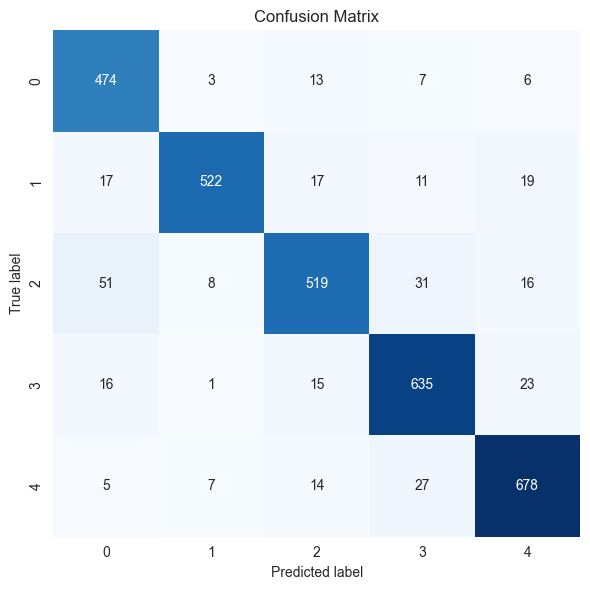

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       503
           1       0.96      0.89      0.93       586
           2       0.90      0.83      0.86       625
           3       0.89      0.92      0.91       690
           4       0.91      0.93      0.92       731

    accuracy                           0.90      3135
   macro avg       0.90      0.90      0.90      3135
weighted avg       0.90      0.90      0.90      3135

Epoch 57/110
--------------------------------------------------
Training Loss: 0.4730, Accuracy: 0.8310
Validation Loss: 0.3031, Accuracy: 0.8967
Epoch 58/110
--------------------------------------------------
Training Loss: 0.4923, Accuracy: 0.8211
Validation Loss: 0.2878, Accuracy: 0.9059
✅ Best model weights saved to model_epoch_final_cw_58.pkt.
Epoch 59/110
--------------------------------------------------
Training Loss: 0.4776, Accuracy: 0.8259
Validation Loss: 0.3271, Accuracy

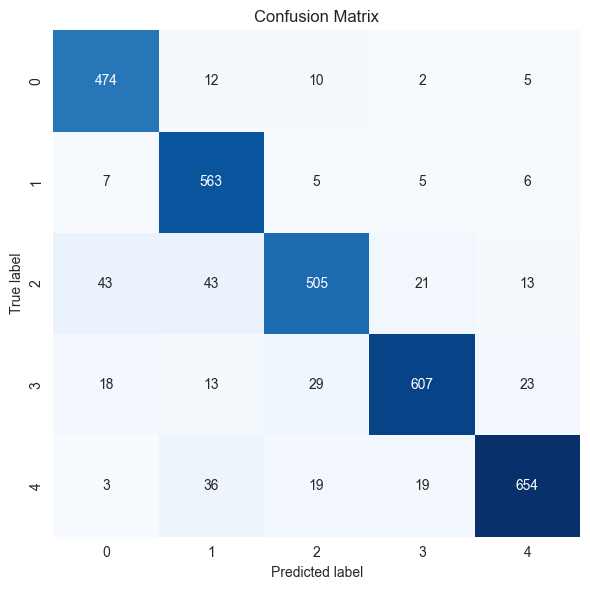

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       503
           1       0.84      0.96      0.90       586
           2       0.89      0.81      0.85       625
           3       0.93      0.88      0.90       690
           4       0.93      0.89      0.91       731

    accuracy                           0.89      3135
   macro avg       0.89      0.90      0.89      3135
weighted avg       0.90      0.89      0.89      3135

Epoch 62/110
--------------------------------------------------
Training Loss: 0.4743, Accuracy: 0.8291
Validation Loss: 0.2995, Accuracy: 0.8967
Epoch 63/110
--------------------------------------------------
Training Loss: 0.4638, Accuracy: 0.8359
Validation Loss: 0.2723, Accuracy: 0.9097
✅ Best model weights saved to model_epoch_final_cw_63.pkt.
Epoch 64/110
--------------------------------------------------
Training Loss: 0.4778, Accuracy: 0.8305
Validation Loss: 0.2758, Accuracy

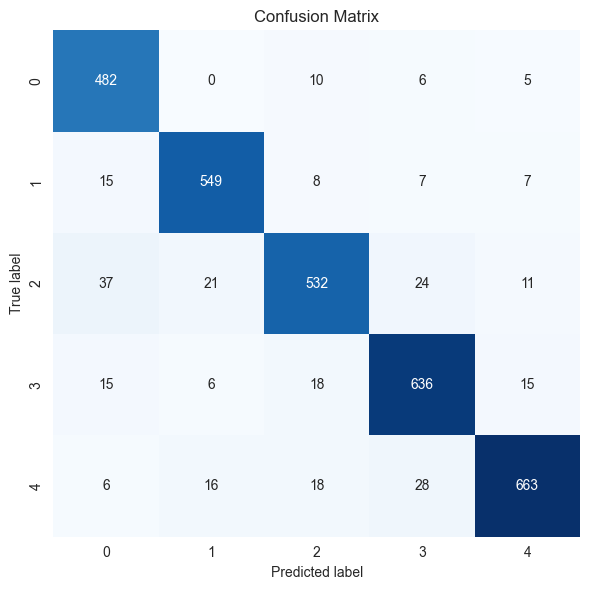

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       503
           1       0.93      0.94      0.93       586
           2       0.91      0.85      0.88       625
           3       0.91      0.92      0.91       690
           4       0.95      0.91      0.93       731

    accuracy                           0.91      3135
   macro avg       0.91      0.92      0.91      3135
weighted avg       0.91      0.91      0.91      3135

Epoch 67/110
--------------------------------------------------
Training Loss: 0.4650, Accuracy: 0.8297
Validation Loss: 0.2664, Accuracy: 0.9148
✅ Best model weights saved to model_epoch_final_cw_67.pkt.
Epoch 68/110
--------------------------------------------------
Training Loss: 0.4669, Accuracy: 0.8329
Validation Loss: 0.2705, Accuracy: 0.9129
Epoch 69/110
--------------------------------------------------
Training Loss: 0.4631, Accuracy: 0.8318
Validation Loss: 0.2666, Accuracy

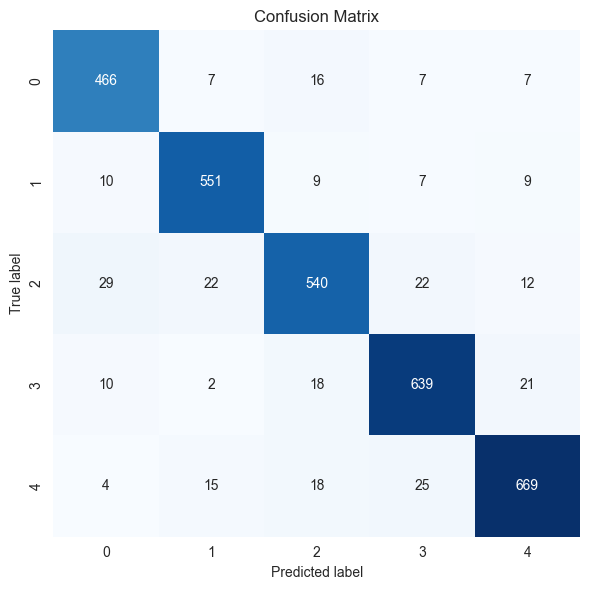

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       503
           1       0.92      0.94      0.93       586
           2       0.90      0.86      0.88       625
           3       0.91      0.93      0.92       690
           4       0.93      0.92      0.92       731

    accuracy                           0.91      3135
   macro avg       0.91      0.91      0.91      3135
weighted avg       0.91      0.91      0.91      3135

Epoch 72/110
--------------------------------------------------
Training Loss: 0.4474, Accuracy: 0.8413
Validation Loss: 0.2680, Accuracy: 0.9097
Epoch 73/110
--------------------------------------------------
Training Loss: 0.4534, Accuracy: 0.8366
Validation Loss: 0.2706, Accuracy: 0.9097
Epoch 74/110
--------------------------------------------------
Training Loss: 0.4543, Accuracy: 0.8366
Validation Loss: 0.2618, Accuracy: 0.9161
✅ Best model weights saved to model_epoch_final_cw

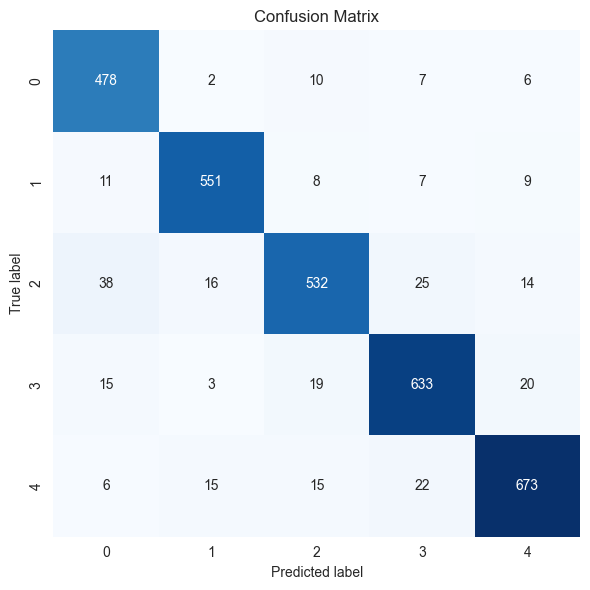

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       503
           1       0.94      0.94      0.94       586
           2       0.91      0.85      0.88       625
           3       0.91      0.92      0.91       690
           4       0.93      0.92      0.93       731

    accuracy                           0.91      3135
   macro avg       0.91      0.92      0.91      3135
weighted avg       0.92      0.91      0.91      3135

Epoch 77/110
--------------------------------------------------
Training Loss: 0.4451, Accuracy: 0.8400
Validation Loss: 0.2594, Accuracy: 0.9183
Epoch 78/110
--------------------------------------------------
Training Loss: 0.4446, Accuracy: 0.8389
Validation Loss: 0.2575, Accuracy: 0.9193
Epoch 79/110
--------------------------------------------------
Training Loss: 0.4471, Accuracy: 0.8413
Validation Loss: 0.2704, Accuracy: 0.9081
Epoch 80/110
-------------------------------------

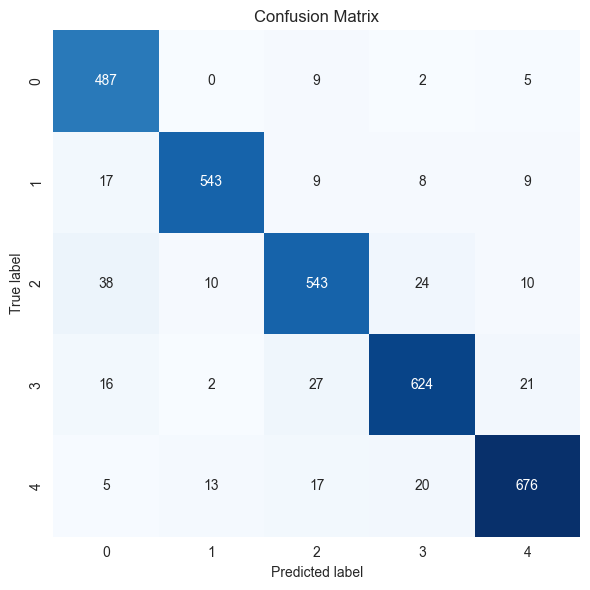

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       503
           1       0.96      0.93      0.94       586
           2       0.90      0.87      0.88       625
           3       0.92      0.90      0.91       690
           4       0.94      0.92      0.93       731

    accuracy                           0.92      3135
   macro avg       0.92      0.92      0.92      3135
weighted avg       0.92      0.92      0.92      3135

Epoch 82/110
--------------------------------------------------
Training Loss: 0.4562, Accuracy: 0.8339
Validation Loss: 0.2575, Accuracy: 0.9139
Epoch 83/110
--------------------------------------------------
Training Loss: 0.4405, Accuracy: 0.8450
Validation Loss: 0.2626, Accuracy: 0.9085
Epoch 84/110
--------------------------------------------------
Training Loss: 0.4421, Accuracy: 0.8448
Validation Loss: 0.2662, Accuracy: 0.9126
Epoch 85/110
-------------------------------------

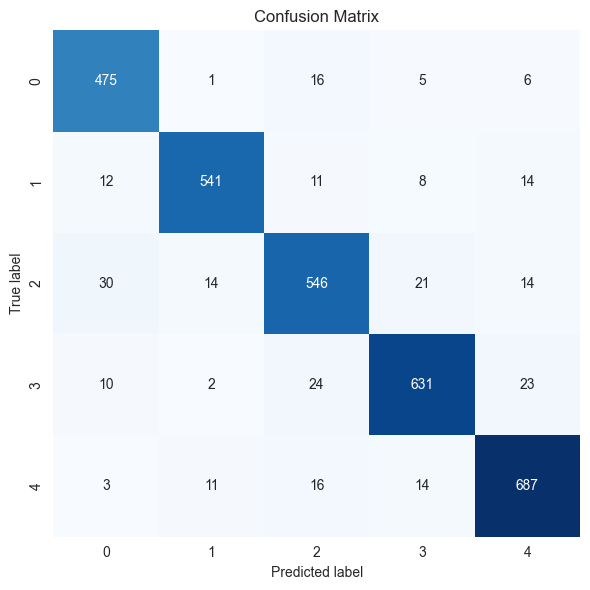

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       503
           1       0.95      0.92      0.94       586
           2       0.89      0.87      0.88       625
           3       0.93      0.91      0.92       690
           4       0.92      0.94      0.93       731

    accuracy                           0.92      3135
   macro avg       0.92      0.92      0.92      3135
weighted avg       0.92      0.92      0.92      3135

Epoch 87/110
--------------------------------------------------
Training Loss: 0.4365, Accuracy: 0.8418
Validation Loss: 0.2483, Accuracy: 0.9183
✅ Best model weights saved to model_epoch_final_cw_87.pkt.
Epoch 88/110
--------------------------------------------------
Training Loss: 0.4359, Accuracy: 0.8439
Validation Loss: 0.2469, Accuracy: 0.9190
✅ Best model weights saved to model_epoch_final_cw_88.pkt.
Epoch 89/110
--------------------------------------------------
Training Loss:

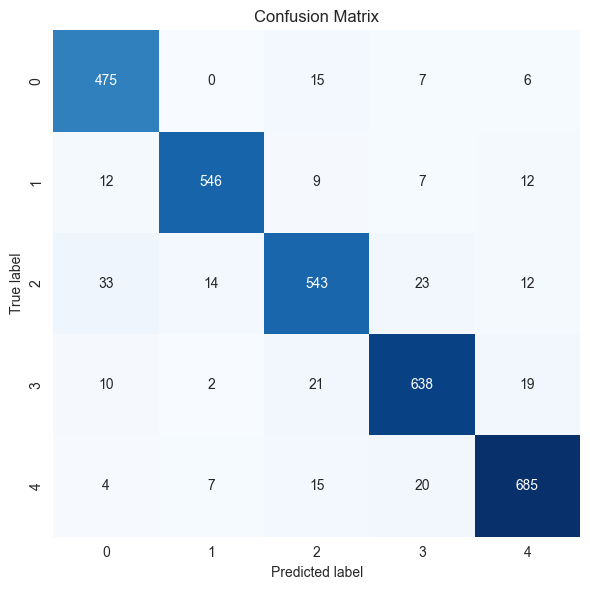

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       503
           1       0.96      0.93      0.95       586
           2       0.90      0.87      0.88       625
           3       0.92      0.92      0.92       690
           4       0.93      0.94      0.94       731

    accuracy                           0.92      3135
   macro avg       0.92      0.92      0.92      3135
weighted avg       0.92      0.92      0.92      3135

Epoch 92/110
--------------------------------------------------
Training Loss: 0.4342, Accuracy: 0.8415
Validation Loss: 0.2425, Accuracy: 0.9203
✅ Best model weights saved to model_epoch_final_cw_92.pkt.
Epoch 93/110
--------------------------------------------------
Training Loss: 0.4503, Accuracy: 0.8382
Validation Loss: 0.2428, Accuracy: 0.9209
Epoch 94/110
--------------------------------------------------
Training Loss: 0.4395, Accuracy: 0.8410
Validation Loss: 0.2495, Accuracy

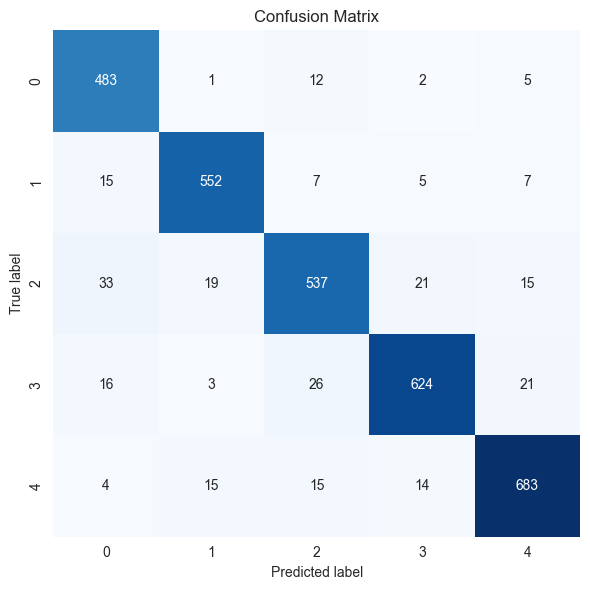

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       503
           1       0.94      0.94      0.94       586
           2       0.90      0.86      0.88       625
           3       0.94      0.90      0.92       690
           4       0.93      0.93      0.93       731

    accuracy                           0.92      3135
   macro avg       0.92      0.92      0.92      3135
weighted avg       0.92      0.92      0.92      3135

Epoch 97/110
--------------------------------------------------
Training Loss: 0.4346, Accuracy: 0.8451
Validation Loss: 0.2424, Accuracy: 0.9203
✅ Best model weights saved to model_epoch_final_cw_97.pkt.
Epoch 98/110
--------------------------------------------------
Training Loss: 0.4391, Accuracy: 0.8398
Validation Loss: 0.2431, Accuracy: 0.9180
Epoch 99/110
--------------------------------------------------
Training Loss: 0.4325, Accuracy: 0.8452
Validation Loss: 0.2420, Accuracy

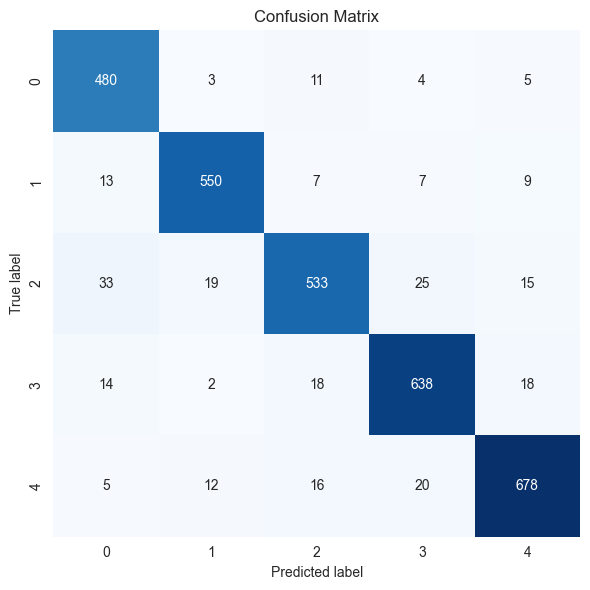

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       503
           1       0.94      0.94      0.94       586
           2       0.91      0.85      0.88       625
           3       0.92      0.92      0.92       690
           4       0.94      0.93      0.93       731

    accuracy                           0.92      3135
   macro avg       0.92      0.92      0.92      3135
weighted avg       0.92      0.92      0.92      3135

Epoch 102/110
--------------------------------------------------
Training Loss: 0.4188, Accuracy: 0.8518
Validation Loss: 0.2440, Accuracy: 0.9199
Epoch 103/110
--------------------------------------------------
Training Loss: 0.4232, Accuracy: 0.8512
Validation Loss: 0.2436, Accuracy: 0.9196
Epoch 104/110
--------------------------------------------------
Training Loss: 0.4319, Accuracy: 0.8470
Validation Loss: 0.2446, Accuracy: 0.9187
Epoch 105/110
---------------------------------

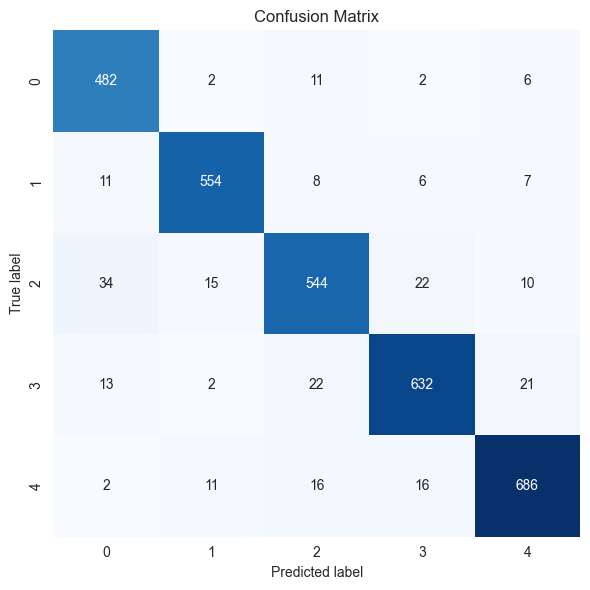

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       503
           1       0.95      0.95      0.95       586
           2       0.91      0.87      0.89       625
           3       0.93      0.92      0.92       690
           4       0.94      0.94      0.94       731

    accuracy                           0.92      3135
   macro avg       0.92      0.93      0.92      3135
weighted avg       0.92      0.92      0.92      3135

Epoch 107/110
--------------------------------------------------
Training Loss: 0.4184, Accuracy: 0.8492
Validation Loss: 0.2420, Accuracy: 0.9215
Epoch 108/110
--------------------------------------------------
Training Loss: 0.4297, Accuracy: 0.8491
Validation Loss: 0.2432, Accuracy: 0.9203
Epoch 109/110
--------------------------------------------------
Training Loss: 0.4376, Accuracy: 0.8418
Validation Loss: 0.2418, Accuracy: 0.9206
Epoch 110/110
---------------------------------

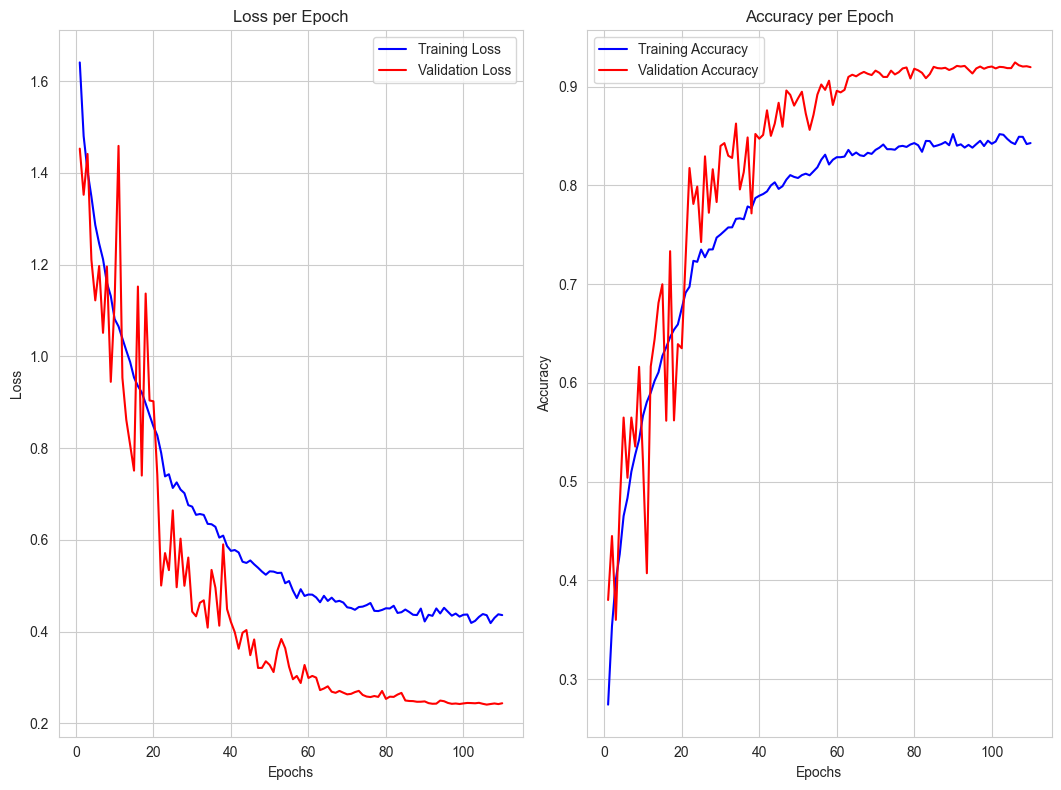

In [43]:
#testing with other weights
class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0, monitor='loss'):
        """
        patience: How many epochs to wait before stopping.
        verbose: Whether to print progress.
        delta: Minimum change to qualify as an improvement.
        monitor: What to monitor ('loss' or 'accuracy').
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = float('inf') if monitor == 'loss' else -float('inf')  # Initialize based on monitor type
        self.best_epoch = 0
        self.early_stop = False
        self.delta = delta
        self.monitor = monitor  # What to monitor: 'loss' or 'accuracy'

    def __call__(self, val_score, epoch, model_weights, model_name_prefix):
        """
        val_score: The validation loss/accuracy in the current epoch.
        epoch: The current epoch.
        model_weights: The weights of the model (usually model.state_dict()).
        model_name_prefix: The prefix for the model's name (e.g., 'model_1', 'model_2').
        """
        # If monitoring 'loss', we expect the value to decrease
        if self.monitor == 'loss':
            if val_score < self.best_score - self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weights, model_name_prefix)
            else:
                self.counter += 1
        # If monitoring 'accuracy', we expect the value to increase
        elif self.monitor == 'accuracy':
            if val_score > self.best_score + self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weights, model_name_prefix)
            else:
                self.counter += 1

        if self.counter >= self.patience:
            self.early_stop = True
            if self.verbose:
                print(f"Early stopping triggered after {self.counter} epochs of no improvement.")

    def save_best_weights(self, model_weights, model_name_prefix):
        """
        Save the model weights with a unique name for each model.
        model_name_prefix: The prefix for the model's name (e.g., 'model_1', 'model_2').
        """
        model_name = f"{model_name_prefix}_epoch_final_cw_{self.best_epoch + 1}.pkt"

        torch.save(model_weights, model_name)
        if self.verbose:
            print(f"✅ Best model weights saved to {model_name}.")


#train loop
best_val_loss = float('inf')  # Initialize best validation loss
best_model_weights = None


def train_and_validate(model, train_loader, valid_loader, optimizer, scheduler, criterion, model_name_prefix, epochs=25,
                       device=None, early_stopping=None):
    # Store losses and accuracies
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    auc_scores = []

    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        print('-' * 50)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            # Ensure labels are Long for CrossEntropyLoss
            labels = labels.long()  # Cast labels to Long

            # Mixed precision forward pass
            with torch.amp.autocast('cuda'):
                raw_outputs = model(inputs)  # Get raw logits (not passed through softmax)
                loss = criterion(raw_outputs, labels)  # Compute loss

            # Backward pass with mixed precision
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item() * inputs.size(0)

            # Compute predictions (Get class with highest logit)
            with torch.no_grad():
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store training loss and accuracy
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Ensure labels are Long for CrossEntropyLoss
                labels = labels.long()  # Cast labels to Long

                with torch.amp.autocast('cuda'):
                    raw_outputs = model(inputs)  # Get raw logits
                    loss = criterion(raw_outputs, labels)  # Compute loss

                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
                correct_preds += torch.sum(preds == labels.data)
                total_preds += labels.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_loss = running_loss / len(valid_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Validation Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store validation loss and accuracy
        valid_losses.append(epoch_loss)
        valid_accuracies.append(epoch_acc.item())

        # Step the scheduler based on validation loss
        scheduler.step(epoch_loss)

        # ✅ Early stopping check: save model based on validation loss
        if early_stopping is not None:
            early_stopping(epoch_loss, epoch, model.state_dict(), model_name_prefix="model")
            if early_stopping.early_stop:
                print(f"🚨 Early stopping triggered at epoch {epoch + 1}.")
                break

        # ✅ Display confusion matrix & classification report every 5 epochs
        if epoch % 5 == 0 or early_stopping.early_stop:
            cm = confusion_matrix(all_labels, all_preds)
            plot_confusion_matrix(cm, classes=[i for i in range(len(set(all_labels)))])
            print("Classification Report:")
            print(classification_report(all_labels, all_preds))

    # ✅ Load the best model weights from early stopping
    print("Loading best model weights...")
    model.load_state_dict(torch.load("model_epoch_final_cw_{}.pkt".format(early_stopping.best_epoch + 1)))

    # ✅ Plot training metrics
    plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies)

    return model


# Helper function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


# Helper function to plot losses, accuracies, and AUC scores
def plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(16, 8))

    # Plot training and validation loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, label='Training Loss', color='blue')
    plt.plot(epochs, valid_losses, label='Validation Loss', color='red')
    plt.title('Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', color='blue')
    plt.plot(epochs, valid_accuracies, label='Validation Accuracy', color='red')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


from sklearn.metrics import confusion_matrix, classification_report


def test_model(model, test_loader, criterion, device, num_classes=5):
    """
    Evaluates the model on the test set, computes loss and accuracy,
    and displays the confusion matrix and classification report.

    Args:
        model: The trained PyTorch model.
        test_loader: DataLoader for the test set.
        criterion: The loss function used during training (e.g., CrossEntropyLoss).
        device: The device to run inference on (e.g., torch.device('cuda') or torch.device('cpu')).
        num_classes: The number of classes in the classification task.
    """
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Use autocast for mixed precision inference
            with torch.amp.autocast('cuda'):
                raw_outputs = model(inputs)  # Get raw logits from the model
                loss = criterion(raw_outputs, labels)  # Compute loss

            running_loss += loss.item() * inputs.size(0)

            # Get class predictions (highest probability for multi-class)
            _, preds = torch.max(raw_outputs, 1)

            # Update accuracy counters
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

            # Accumulate for metrics
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate overall test loss and accuracy
    test_loss = running_loss / len(test_loader.dataset)
    test_accuracy = correct_preds.double() / total_preds

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Compute confusion matrix and classification report
    cm = confusion_matrix(all_labels, all_preds)
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)]))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(num_classes)],
                yticklabels=[str(i) for i in range(num_classes)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import GradScaler

# ✅ Class weights (based on your dataset size)
# Assuming classes like this: [2315, 2688, 2892, 3215, 3252]
class_counts = torch.tensor([2315, 2688, 2892, 3215, 3252], dtype=torch.float)
weights = 1.0 / class_counts
weights = weights / weights.sum()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))

# ✅ Optimizer
optimizer = optim.AdamW(
    model.parameters(),
    lr=2e-4,  # Raised for better initial learning
    weight_decay=2e-4  # Softer regularization
)

# ✅ LR Scheduler
scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,  # More aggressive drop
    patience=3,  # React quicker to plateaus
    threshold=0.001,
    #verbose=True
)

# ✅ AMP for speed
scaler = GradScaler()

# ✅ Epochs
num_epochs = 110

print(f"✅ Model Initialized on {device}")
# Example:
early_stopping = EarlyStopping(patience=15, verbose=True, delta=0)
model_name_prefix = "cwCNN"  # Or dynamically change this per model
trained_model_cw = train_and_validate(
    model,
    train_loader,
    val_loader,
    optimizer,
    scheduler,
    loss_fn,
    epochs=110,
    device=device,
    early_stopping=early_stopping,
    model_name_prefix=model_name_prefix)

Test Loss: 0.2894, Test Accuracy: 0.9031
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       251
           1       0.94      0.92      0.93       293
           2       0.88      0.87      0.87       313
           3       0.92      0.87      0.90       345
           4       0.90      0.92      0.91       366

    accuracy                           0.90      1568
   macro avg       0.90      0.90      0.90      1568
weighted avg       0.90      0.90      0.90      1568



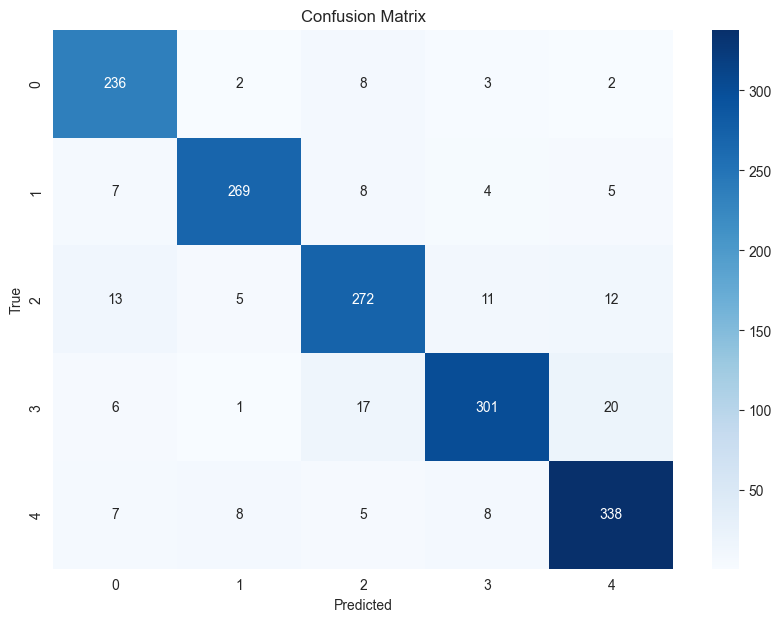

In [44]:
test_model(trained_model_cw, test_loader, loss_fn, device, num_classes=5)

In [46]:
from torchvision import models

model.load_state_dict(torch.load("model_epoch_final_cw_106.pkt", map_location=device))
model.to(device)
model.eval()

def evaluate_from_csv(model, csv_path):
    df = pd.read_csv(csv_path)
    correct = 0
    total = 0

    for _, row in df.iterrows():
        image_path = row['filepath']
        true_label = row['label']

        try:
            img = Image.open(image_path).convert("RGB")
            img_tensor = transform(img).unsqueeze(0).to(device)
        except Exception as e:
            print(f"❌ Skipped {image_path} (error: {e})")
            continue

        with torch.no_grad():
            output = model(img_tensor)
            pred_idx = torch.argmax(output, dim=1).item()
            pred_label = idx_to_label[pred_idx]

        if pred_label == true_label:
            correct += 1
        total += 1

    acc = correct / total if total > 0 else 0
    print(f"\n🎯 Prediction Accuracy from CSV = {acc * 100:.2f}%")


evaluate_from_csv(model, 'test_data.csv')


🎯 Prediction Accuracy from CSV = 90.31%


In [47]:
import os
import torch
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms

#  config
MODEL_PATH = 'model_epoch_final_cw_106.pkt'
TEST_FOLDER = 'largeFaceShape_dataset/test'
SAVE_PATH = 'predictions_cw.txt'
CSV_PATH = 'train_data.csv'
IMAGE_SIZE = 224
NUM_CLASSES = 5

df = pd.read_csv(CSV_PATH)
label_to_idx = {label: idx for idx, label in enumerate(sorted(df['label'].unique()))}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

model = FaceShapeCNN(num_classes=NUM_CLASSES)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.to(device)
model.eval()

def predict_all_images(model, folder_path, save_path):
    results = []
    valid_format = (".jpg", ".jpeg", ".png", ".jfif", ".bmp", ".webp")
    image_count = 0

    for root, _, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(valid_format):
                image_path = os.path.join(root, filename)
                try:
                    img = Image.open(image_path).convert("RGB")
                    img_tensor = transform(img).unsqueeze(0).to(device)
                except Exception as e:
                    print(f"skipped {filename} (error: {e})")
                    continue

                with torch.no_grad():
                    output = model(img_tensor)
                    pred_idx = torch.argmax(output, dim=1).item()
                    pred_label = idx_to_label[pred_idx]

                results.append(f"{filename} --> Predicted: {pred_label}\n")
                image_count += 1

    with open(save_path, 'w') as f:
        f.writelines(results)

    print(f"\n✅ Done! {image_count} images processed.")
    print(f"📄 Predictions saved to: {save_path}")

predict_all_images(model, TEST_FOLDER, SAVE_PATH)



✅ Done! 1313 images processed.
📄 Predictions saved to: predictions_cw.txt


In [49]:
def predict_single_image(model, image_path):
    valid_exts = (".jpg", ".jpeg", ".png", ".jfif", ".bmp", ".webp")

    if not image_path.lower().endswith(valid_exts):
        print("❌ invalid image file format.")
        return

    try:
        img = Image.open(image_path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0).to(device)
    except Exception as e:
        print(f"❌ error loading image: {e}")
        return

    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        pred_idx = torch.argmax(output, dim=1).item()
        pred_label = idx_to_label[pred_idx]

    print(f"✅ predicted face shape: {pred_label}")

img_path = 'round1.jpg'
predict_single_image(model, img_path)

✅ predicted face shape: round
